In [244]:
#A

import pandas as pd

# Load your file
df = pd.read_excel(r"C:\Users\jelli\OneDrive\Desktop\DSBA 6400\Crown Legacy Stats_FULL.xlsx", sheet_name="Sheet1")

# Clean the dataset by removing the first two non-data rows
df = df.iloc[2:].copy()
df.reset_index(drop=True, inplace=True)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [245]:
#B

# Initial Inspection

df.shape              # Rows and columns
df.info()             # Data types and missing values
df.describe()         # Summary stats for all numeric columns
df.head()             # Peek at first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Columns: 109 entries, Date to PPDA
dtypes: float64(104), object(5)
memory usage: 138.1+ KB


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,Throw ins,Accurate throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA
0,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.0,2.77,17.0,4.0,...,19.0,17.0,89.47,4.0,15.00,4.40,8.28,19.22,21.08,8.58
1,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.0,1.37,11.0,9.0,...,13.0,13.0,100.00,5.0,15.40,2.91,19.34,19.15,22.95,17.67
2,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Crown Legacy FC,4-4-2 (100.0%),0.0,3.62,23.0,5.0,...,26.0,25.0,96.15,2.0,15.72,3.38,9.12,14.93,19.57,8.14
3,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Orlando City B,4-4-2 (100.0%),1.0,0.57,10.0,3.0,...,25.0,22.0,88.00,12.0,15.85,3.95,8.09,20.28,19.37,8.72
4,2025-08-23,Crown Legacy FC - Inter Miami II 6:0,United States. MLS Next Pro,93.0,Crown Legacy FC,4-4-2 (100.0%),6.0,4.85,21.0,13.0,...,28.0,24.0,85.71,5.0,15.62,4.05,8.24,15.65,18.99,11.21


In [246]:
#C

# Check for missing values:

df.isnull().sum().sort_values(ascending=False)


Accurate forward passes          13
% Accurate forward passes        13
Forward passes                   12
Match                             0
Date                              0
                                 ..
Average passes per possession     0
Long pass %                       0
Average shot distance             0
Average pass length               0
PPDA                              0
Length: 109, dtype: int64

In [247]:
#D

# Clean & Prepare

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [248]:
#E

# Ensure numeric columns are actually numeric:

numeric_cols = df.columns.drop(['Date', 'Match', 'Competition', 'Team', 'Scheme'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [249]:
#F

# Targeted Summary Stats Key Metrics

df[['Goals', 'xG', 'Shots', 'Shots on Target', 'Possession, %']].describe()


,Goals,xG,Shots,Shots on Target,"Possession, %"
count,162.000000,162.000000,162.000000,162.000000,162.000000
mean,1.716049,1.657654,12.530864,4.925926,50.000000
std,1.389710,0.915492,4.937086,2.692422,7.452329
min,0.000000,0.030000,2.000000,0.000000,25.200000
25%,1.000000,0.942500,9.000000,3.000000,45.627500
50%,1.000000,1.545000,12.000000,5.000000,50.000000
75%,2.750000,2.165000,15.000000,7.000000,54.372500
max,6.000000,5.280000,27.000000,13.000000,74.800000


In [250]:
#G

# Targeted Summary Stats Duels and Passing

df[['Duels', 'Duels Won', 'Duels Won%', 'Passes', 'Accurate Passes', '% Accurate Passes']].describe()

,Duels,Duels Won,Duels Won%,Passes,Accurate Passes,% Accurate Passes
count,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000
mean,195.938272,95.024691,48.49963,426.518519,359.395062,83.674074
std,27.530377,15.955275,4.47456,85.888431,84.813230,4.472673
min,144.000000,55.000000,37.89000,168.000000,106.000000,63.100000
25%,177.000000,85.000000,45.08750,369.750000,302.250000,81.477500
50%,193.000000,93.000000,48.61000,425.500000,357.500000,84.485000
75%,211.000000,104.750000,51.82500,471.750000,406.000000,86.440000
max,294.000000,156.000000,58.06000,722.000000,669.000000,92.660000


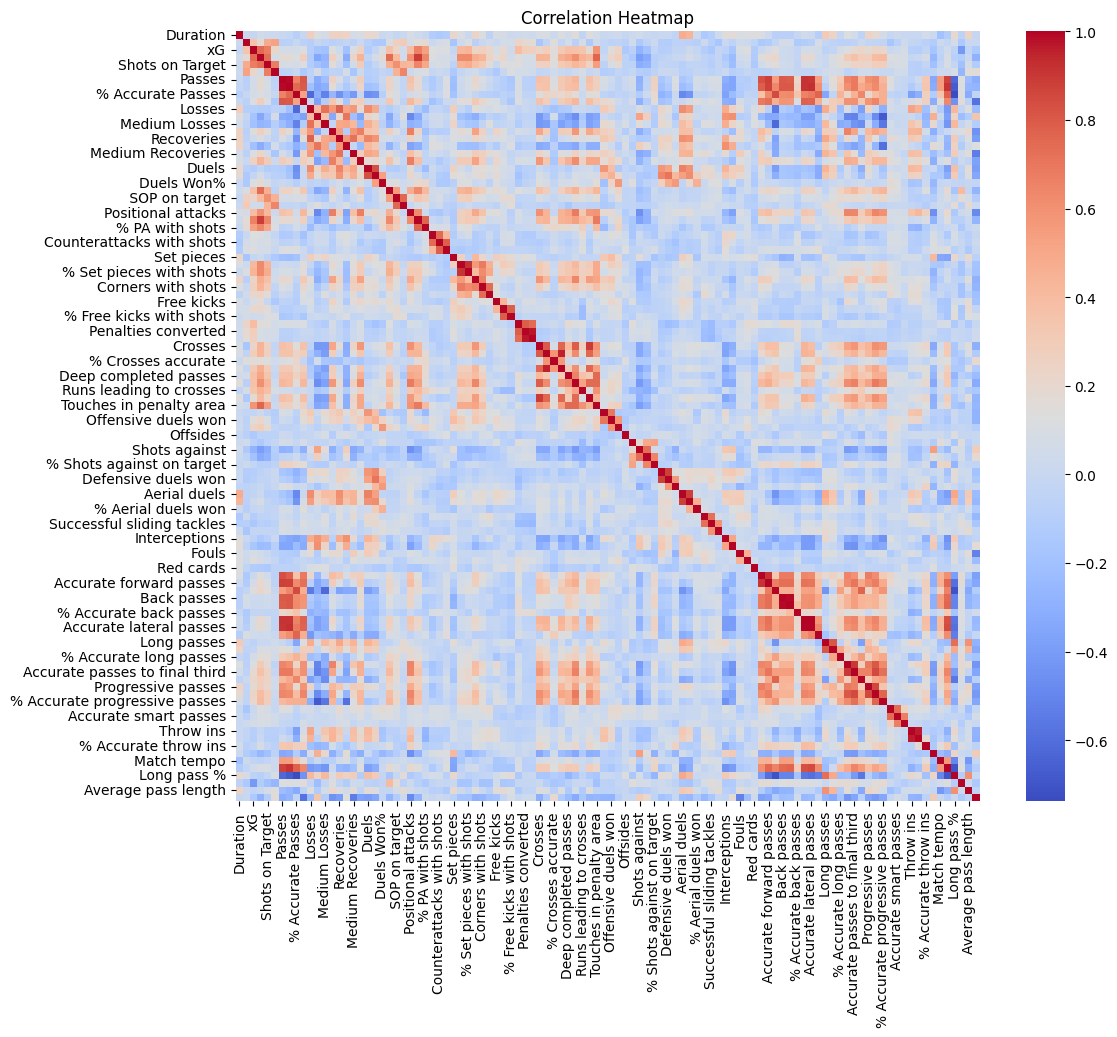

In [251]:
#H

# Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


<Axes: title={'center': 'Goals vs xG Over Time'}, xlabel='Date'>

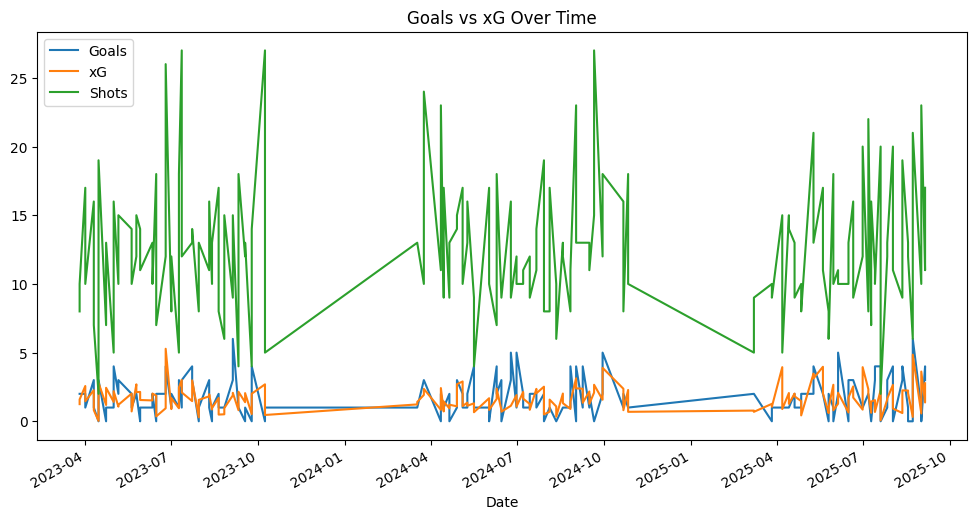

In [252]:
#I

# Time-Based Trends

df.sort_values('Date', inplace=True)
df.set_index('Date')[['Goals', 'xG', 'Shots']].plot(figsize=(12, 6), title='Goals vs xG Over Time')

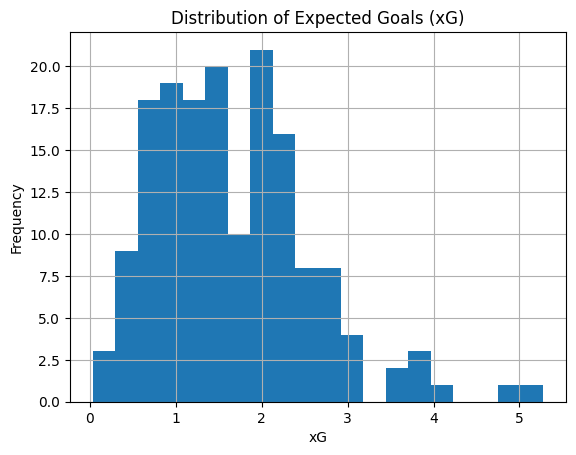

In [253]:
#J

# Distributions & Histograms

df['xG'].hist(bins=20)
plt.title("Distribution of Expected Goals (xG)")
plt.xlabel("xG")
plt.ylabel("Frequency")
plt.show()

In [254]:
#K

# Top Performances / Outliers

df.nlargest(5, 'Goals')[['Match', 'Goals', 'xG']]
df.nsmallest(5, 'PPDA')[['Match', 'PPDA']]  # Most aggressive pressing

,Match,PPDA
144,Crown Legacy FC - Philadelphia Union II (P) 2:2,4.18
20,Crown Legacy FC - Orlando City B 2:2 (P),4.95
114,Crown Legacy FC - New York RB II (P) 1:1,5.23
103,Chicago Fire II - Crown Legacy FC 2:0,5.53
53,Cincinnati II - Crown Legacy FC 1:2,5.80


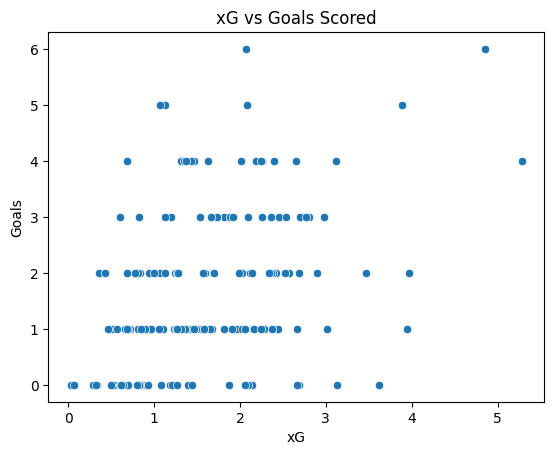

In [255]:
#L

# Relationship Plots

sns.scatterplot(data=df, x='xG', y='Goals')
plt.title("xG vs Goals Scored")
plt.show()

In [256]:
#M

# Grouped Comparisons

df.groupby('Scheme')[['Goals', 'xG', 'Shots']].mean().sort_values(by='Goals', ascending=False)


,Goals,xG,Shots
Scheme,,,
4-2-3-1 (85.14%),5.000000,1.130000,9.000000
4-3-3 (91.9%),4.000000,1.430000,11.000000
4-1-3-2 (49.59%),4.000000,1.630000,7.000000
4-4-2 (88.12%),4.000000,3.120000,13.000000
4-3-3 (68.23%),3.000000,2.980000,14.000000
4-4-1-1 (80.58%),3.000000,1.820000,11.000000
4-2-2-2 (73.01%),3.000000,0.820000,9.000000
4-2-3-1 (75.62%),3.000000,0.600000,9.000000
4-2-3-1 (95.99%),3.000000,2.540000,16.000000


In [257]:
#N

crown_df = df[df['Team'] == 'Crown Legacy FC'].copy()
crown_df.reset_index(drop=True, inplace=True)


In [258]:
#O

defensive_kpis = [
    'Conceded goals', 'Shots against', 'Shots against on target',
    'Interceptions', 'Clearances', 'Fouls',
    'Sliding tackles', 'Successful sliding tackles', '% Successful sliding tackles',
    'Defensive duels', 'Defensive duels won', '% Defensive duels won',
    'Aerial duels', 'Aerial duels won', '% Aerial duels won',
    'Recoveries', 'Duels', 'Duels Won', 'Duels Won%',
    'PPDA', 'Yellow cards', 'Red cards'
]

crown_def = crown_df[['Date', 'Match', 'Scheme'] + defensive_kpis].copy()


In [259]:
#P

crown_def['Season'] = pd.to_datetime(crown_def['Date']).dt.year


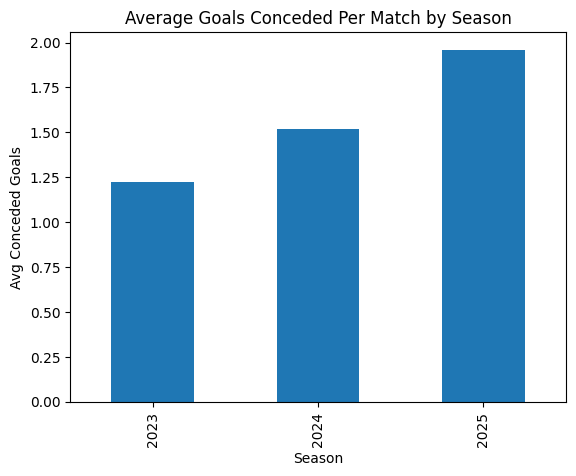

In [260]:
#Q

import matplotlib.pyplot as plt

crown_def.groupby('Season')['Conceded goals'].mean().plot(kind='bar')
plt.title('Average Goals Conceded Per Match by Season')
plt.ylabel('Avg Conceded Goals')
plt.xlabel('Season')
plt.show()


In [261]:
#R

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = crown_def[defensive_kpis].copy()
X = X.dropna()  # drop missing values for modeling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
crown_def['Cluster'] = kmeans.fit_predict(X_scaled)
    

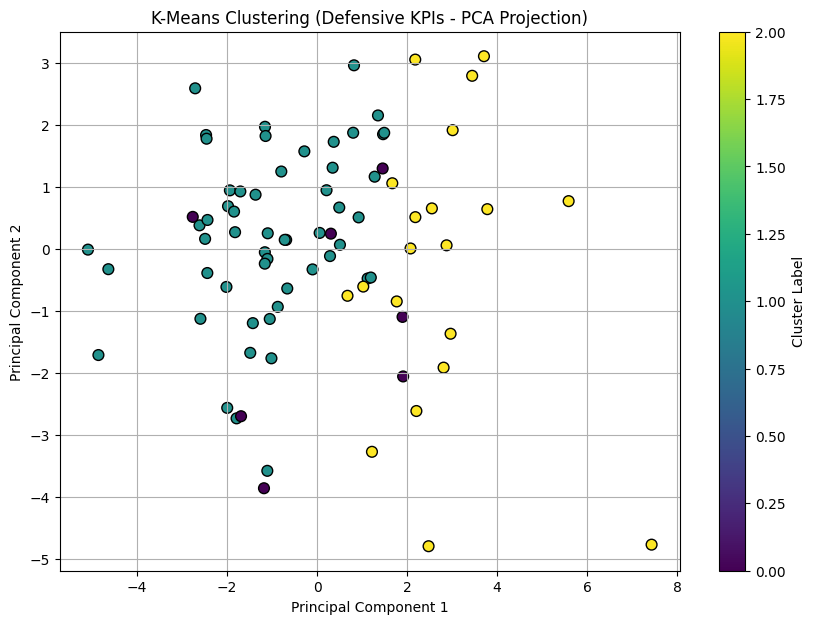

In [262]:
#S

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Add cluster labels to your DataFrame
X_df = pd.DataFrame(X_scaled, columns=defensive_kpis)  # X_scaled is your standardized data
X_df['Cluster'] = kmeans.labels_

# Step 2: Reduce to 2D using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Step 3: Create a plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    principal_components[:, 0],  # PC1
    principal_components[:, 1],  # PC2
    c=X_df['Cluster'],
    cmap='viridis',
    edgecolor='k',
    s=60
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (Defensive KPIs - PCA Projection)')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


In [263]:
#T

df_cl_only = df[df['Team'] == 'Crown Legacy FC'].copy()
df_cl_only['Cluster'] = kmeans.labels_

# Now summarize clusters
cluster_summary = df_cl_only.groupby('Cluster')[defensive_kpis].mean()
display(cluster_summary)


,Conceded goals,Shots against,Shots against on target,Interceptions,Clearances,Fouls,Sliding tackles,Successful sliding tackles,% Successful sliding tackles,Defensive duels,...,Aerial duels,Aerial duels won,% Aerial duels won,Recoveries,Duels,Duels Won,Duels Won%,PPDA,Yellow cards,Red cards
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.428571,18.571429,7.285714,43.714286,18.857143,12.571429,3.571429,2.142857,70.952857,73.571429,...,23.428571,8.571429,38.187143,70.285714,197.00000,95.285714,48.512857,12.718571,2.571429,1.000000
1,1.407407,10.981481,4.444444,32.481481,11.074074,13.666667,3.296296,1.555556,47.689630,71.185185,...,20.851852,9.148148,43.860926,68.000000,183.87037,86.925926,47.351852,11.237407,2.444444,0.055556
2,1.650000,11.400000,4.600000,42.500000,16.200000,14.650000,4.850000,2.700000,52.938000,78.150000,...,38.250000,17.500000,47.387500,87.200000,228.15000,109.750000,48.290000,8.281000,2.250000,0.050000


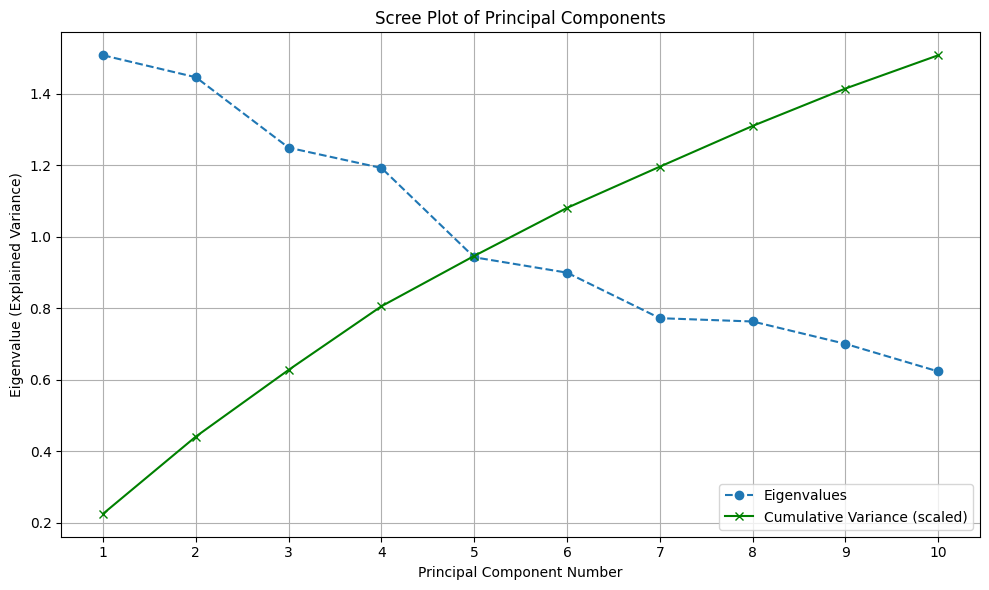

In [264]:
#U

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Load your actual dataset here (replace this with your defensive features)
# Example below is dummy data — replace with your real DataFrame
# data = df_cl_only[defensive_kpis].dropna()  # Use this in your real notebook

# TEMP dummy data for testing
data = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Run PCA
pca = PCA(n_components=None)
pca.fit(scaled_data)

# 4. Explained variance (eigenvalues)
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# 5. Scree Plot
plt.figure(figsize=(10, 6))
components = np.arange(1, len(eigenvalues) + 1)

plt.plot(components, eigenvalues, marker='o', linestyle='--', label='Eigenvalues')
plt.plot(components, cumulative_variance * max(eigenvalues), marker='x', linestyle='-', color='green', label='Cumulative Variance (scaled)')

plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.xticks(components)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


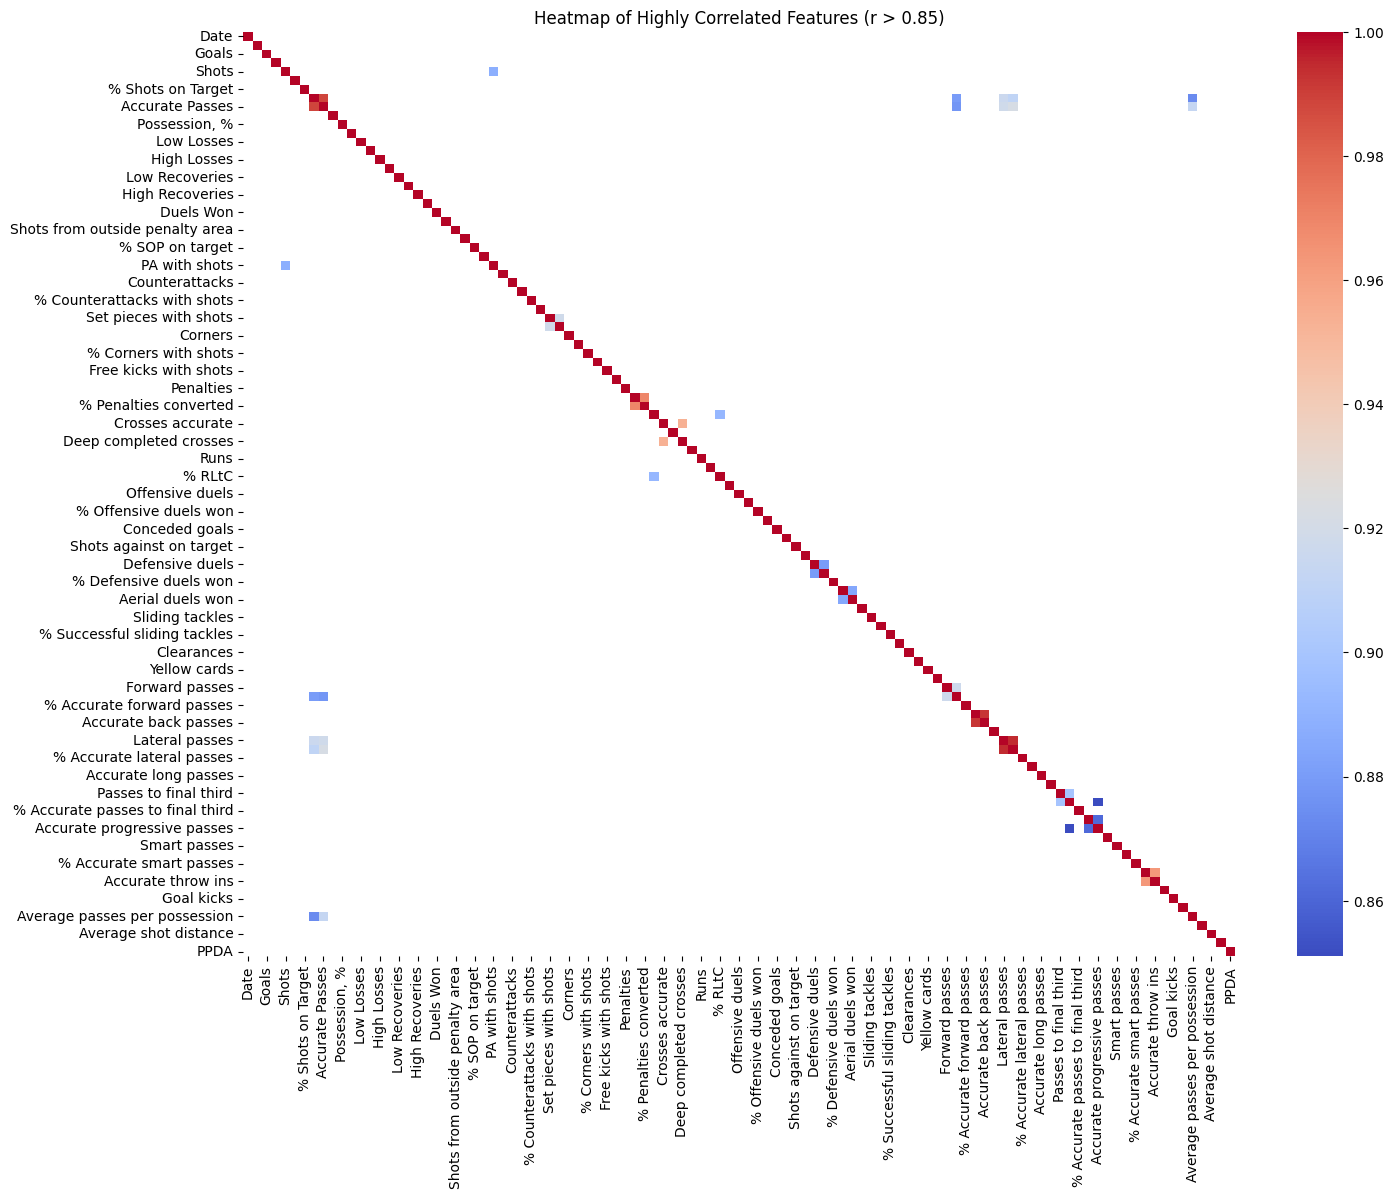

In [265]:
#V

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert all columns to numeric if possible (non-convertible ones become NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop non-numeric or mostly NaN columns
df_numeric = df_numeric.dropna(axis=1, thresh=len(df_numeric) * 0.75)

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Plot heatmap for correlations above 0.85
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, mask=(corr_matrix < 0.85), cbar=True)
plt.title("Heatmap of Highly Correlated Features (r > 0.85)")
plt.show()


In [266]:
#W

import pandas as pd
import numpy as np

# Load your data
df = pd.read_excel(r"C:\Users\jelli\OneDrive\Desktop\DSBA 6400\Crown Legacy Stats_FULL.xlsx")
df = df.iloc[2:].copy()
df.reset_index(drop=True, inplace=True)

# Convert all columns to numeric if possible (non-convertible ones become NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop mostly NaN columns
df_numeric = df_numeric.dropna(axis=1, thresh=len(df_numeric) * 0.75)

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Unstack the correlation matrix and remove self-correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Drop duplicate pairs (A-B and B-A)
corr_pairs = corr_pairs.drop_duplicates()

# Filter and sort pairs with correlation above threshold (e.g., 0.85)
high_corr = corr_pairs[corr_pairs > 0.85].sort_values(ascending=False)

# Display the top correlated feature pairs
pd.set_option('display.max_rows', 100)  # show more rows if needed
display(high_corr)


Lateral passes                  Accurate lateral passes           0.994567
Back passes                     Accurate back passes              0.992273
Passes                          Accurate Passes                   0.988535
Penalties converted             % Penalties converted             0.969743
Throw ins                       Accurate throw ins                0.962778
Crosses accurate                Deep completed crosses            0.953293
Accurate Passes                 Accurate lateral passes           0.921581
Set pieces with shots           % Set pieces with shots           0.918286
Accurate Passes                 Lateral passes                    0.918058
Forward passes                  Accurate forward passes           0.917364
Passes                          Lateral passes                    0.915831
Accurate Passes                 Average passes per possession     0.912916
Passes                          Accurate lateral passes           0.910751
Passes to final third    

In [267]:
#X

import numpy as np

# Step 1: Recalculate correlation matrix (if not already in memory)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr().abs()

# Step 2: Get highly correlated feature pairs
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature_1", "level_1": "Feature_2", 0: "Correlation"})
    .query("Correlation > 0.85")
    .sort_values(by="Correlation", ascending=False)
)

# Step 3: Logic to drop one feature from each pair
drop_keywords = ['accurate', '%', 'converted']

features_to_drop = []
for _, row in high_corr_pairs.iterrows():
    f1, f2 = row['Feature_1'], row['Feature_2']
    f1_lower = f1.lower()
    f2_lower = f2.lower()
    
    f1_has_keyword = any(keyword in f1_lower for keyword in drop_keywords)
    f2_has_keyword = any(keyword in f2_lower for keyword in drop_keywords)
    
    if f2_has_keyword and not f1_has_keyword:
        features_to_drop.append(f2)
    elif f1_has_keyword and not f2_has_keyword:
        features_to_drop.append(f1)
    # If both or neither match, you can add custom logic or skip

# Show the list of features recommended for dropping
print("🔻 Features suggested for removal due to high correlation:\n")
for feature in sorted(set(features_to_drop)):
    print("-", feature)


🔻 Features suggested for removal due to high correlation:

- % RLtC
- % Set pieces with shots
- Accurate Passes
- Accurate back passes
- Accurate forward passes
- Accurate lateral passes
- Accurate passes to final third
- Accurate progressive passes
- Accurate throw ins
- Crosses accurate


In [268]:
#Y

df_reduced = df.drop(columns=set(features_to_drop))

In [269]:
#Z

# Display the first few rows to inspect the data
print("Preview of df_reduced:")
display(df_reduced.head())

# Get the shape of the DataFrame
print(f"\n df_reduced shape: {df_reduced.shape} (rows, columns)")

# List remaining column names
print("\n Remaining columns:")
for col in df_reduced.columns:
    print("-", col)


Preview of df_reduced:


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,% Accurate smart passes,Throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA
0,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.0,2.77,17.0,4.0,...,100.0,19.0,89.47,4.0,15.00,4.40,8.28,19.22,21.08,8.58
1,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.0,1.37,11.0,9.0,...,0.0,13.0,100.00,5.0,15.40,2.91,19.34,19.15,22.95,17.67
2,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Crown Legacy FC,4-4-2 (100.0%),0.0,3.62,23.0,5.0,...,0.0,26.0,96.15,2.0,15.72,3.38,9.12,14.93,19.57,8.14
3,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Orlando City B,4-4-2 (100.0%),1.0,0.57,10.0,3.0,...,0.0,25.0,88.00,12.0,15.85,3.95,8.09,20.28,19.37,8.72
4,2025-08-23,Crown Legacy FC - Inter Miami II 6:0,United States. MLS Next Pro,93.0,Crown Legacy FC,4-4-2 (100.0%),6.0,4.85,21.0,13.0,...,0.0,28.0,85.71,5.0,15.62,4.05,8.24,15.65,18.99,11.21



 df_reduced shape: (162, 99) (rows, columns)

 Remaining columns:
- Date
- Match
- Competition
- Duration
- Team
- Scheme
- Goals
- xG
- Shots
- Shots on Target
- % Shots on Target
- Passes
- % Accurate Passes
- Possession, %
- Losses
- Low Losses
- Medium Losses
- High Losses
- Recoveries
- Low Recoveries
- Medium Recoveries
- High Recoveries
- Duels
- Duels Won
- Duels Won%
- Shots from outside penalty area
-  SOP on target
- % SOP on target
- Positional attacks
- PA with shots
- % PA with shots
- Counterattacks
- Counterattacks with shots
- % Counterattacks with shots
- Set pieces
- Set pieces with shots
- Corners
- Corners with shots
- % Corners with shots
- Free kicks
- Free kicks with shots
- % Free kicks with shots
- Penalties
- Penalties converted
- % Penalties converted
- Crosses
- % Crosses accurate
- Deep completed crosses
- Deep completed passes
- Runs
- Runs leading to crosses
- Touches in penalty area
- Offensive duels
- Offensive duels won
- % Offensive duels won
- Offs

In [270]:
#AA

# Defensive KPI's that are also relevant features (based on correlation analysis):


# - Conceded goals  
# - Shots against  
# - Shots against on target  
# - Interceptions  
# - Clearances  
# - Fouls  
# - Sliding tackles  
# - Successful sliding tackles  
# - % Successful sliding tackles  
# - Defensive duels  
# - Defensive duels won  
# - % Defensive duels won  
# - Aerial duels  
# - Aerial duels won  
# - % Aerial duels won  
# - Recoveries  
# - Duels  
# - Duels Won  
# - Duels Won%  
# - PPDA  
# - Yellow cards  
# - Red cards  


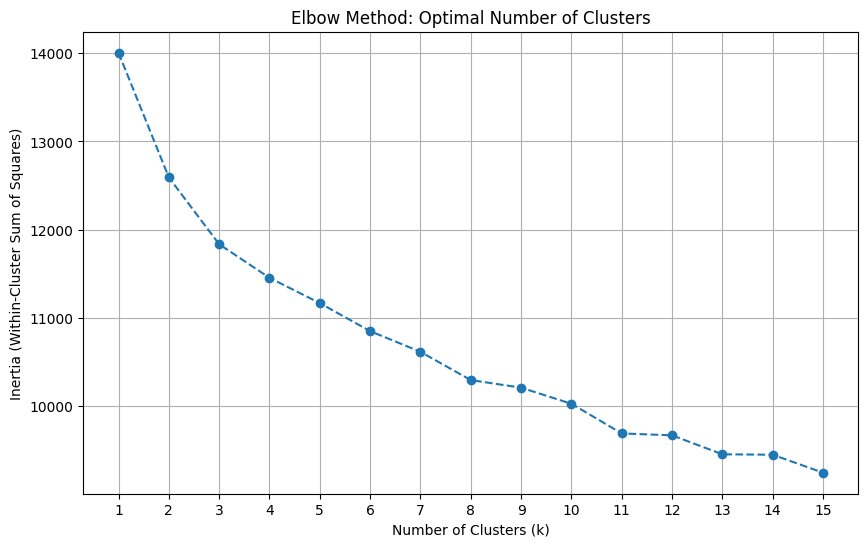

In [271]:
#AB

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Select numeric data only
df_cluster = df_reduced.select_dtypes(include='number')

# Step 2: Drop rows with missing values (only for clustering purposes)
df_cluster_clean = df_cluster.dropna()

# Step 3: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster_clean)

# Step 4: Elbow method
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Step 5: Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(k_range)
plt.show()


In [272]:
#AC

# There's a sharp drop in inertia from k=1 to k=3.
# The decrease becomes more gradual between k=4 and k=6.
# After k=6 or 7, the curve flattens quite a bit, indicating diminishing returns as more clusters are added.

In [273]:
#AD

# k = 4
# This gives a nice balance between simplicity and insight without overcomplicating the clusters.


In [274]:
#AE

# 2b. Drop rows with missing values before PCA
df_cleaned = df_reduced.dropna().reset_index(drop=True)

# 3. Extract numeric features and scale
numeric_cols = df_cleaned.select_dtypes(include='number').columns
X = df_cleaned[numeric_cols]
scaled_X = scaler.fit_transform(X)

# 4. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)

# 5. KMeans clustering (use k=4 or your preferred number)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_X)

# 6. Add cluster labels and PCA components back to the DataFrame
df_cleaned['Cluster'] = clusters
df_cleaned['PC1'] = X_pca[:, 0]
df_cleaned['PC2'] = X_pca[:, 1]


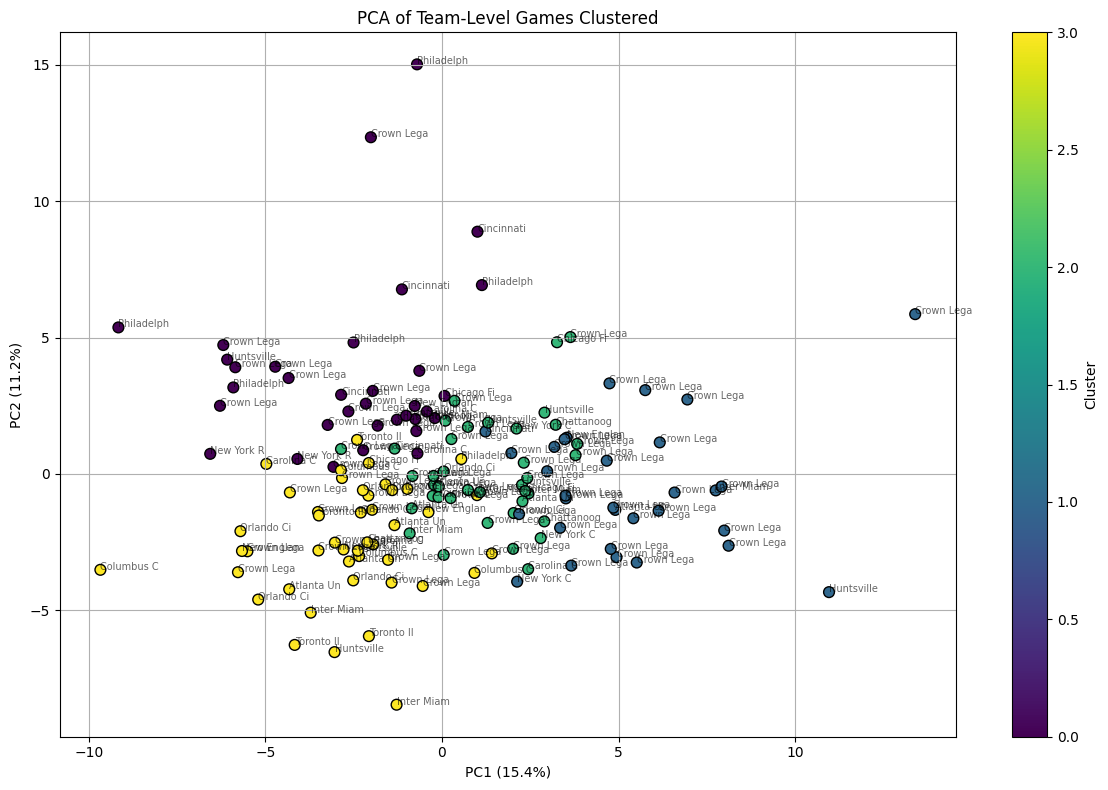

In [275]:
#AF

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_cleaned['PC1'], df_cleaned['PC2'],
                      c=df_cleaned['Cluster'], cmap='viridis', s=60, edgecolor='k')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA of Team-Level Games Clustered')
plt.colorbar(scatter, label='Cluster')

# Optional: label points with team or match
for i, row in df_cleaned.iterrows():
    label = f"{row['Team'][:10]}"
    plt.text(row['PC1'], row['PC2'], label, fontsize=7, alpha=0.6)

plt.grid(True)
plt.tight_layout()
plt.show()


In [276]:
#AG

# Get the names of numeric features
feature_names = numeric_cols  # same as the ones used in scaled_X

# Create a DataFrame of PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)

# Display top contributing features for each component
for pc in loadings.columns:
    print(f"\nTop features for {pc}:")
    print(loadings[pc].sort_values(ascending=False).head(5))



Top features for PC1:
Runs                             0.206063
% Accurate progressive passes    0.200229
Passes                           0.192958
Positional attacks               0.191863
Lateral passes                   0.190569
Name: PC1, dtype: float64

Top features for PC2:
Recoveries      0.244766
Duels           0.237212
Losses          0.236792
Aerial duels    0.231136
Duels Won       0.224321
Name: PC2, dtype: float64


In [277]:
#AH

# Principal Component 1 (PC1): Overall Ball Progression & Possession Play

# Top contributors:

# -Runs
# -% Accurate progressive passes
# -Passes
# -Positional attacks
# -Lateral passes

##########################################################

# Interpretation:

# PC1 seems to represent a possession-based or build-up style of play.

# Teams or matches with high PC1 scores likely:
# -Keep the ball more often,
# -Build attacks through progressive passing,
# -Use structured, positional play,
# -Involve more runs off the ball and lateral movement to maintain possession.
# -In short, PC1 reflects how controlled, patient, and possession-oriented the team’s play is.

##########################################################

# could label PC1 as something like:
# “Possession & Progression Index” or “Build-Up Play Component.”

In [278]:
#AI

# Principal Component 2 (PC2): Defensive Engagement & Duel Intensity

# Top contributors:

# -Recoveries
# -Duels
# -Losses
# -Aerial duels
# -Duels Won

##########################################################

# Interpretation:

# PC2 measures the intensity of physical defensive actions — especially ground and aerial duels.

# Matches with high PC2 scores suggest the team was:
# -Heavily involved in defensive contests (lots of duels),
# -Active in recovering possession,
# -Sometimes losing the ball more (indicating a scrappier, high-contact style).
# -This axis captures how physically involved and aggressive the team’s defense was.

In [279]:
#AJ

# Summary of What These Mean Together: 

# | Component | Represents                       | Example Match Style (High Value)                       |
# | --------- | -------------------------------- | ------------------------------------------------------ |
# | **PC1**   | Possession & progression         | Patient build-up, accurate passing, positional attacks |
# | **PC2**   | Defensive engagement & intensity | Active duels, recoveries, high defensive pressure      |


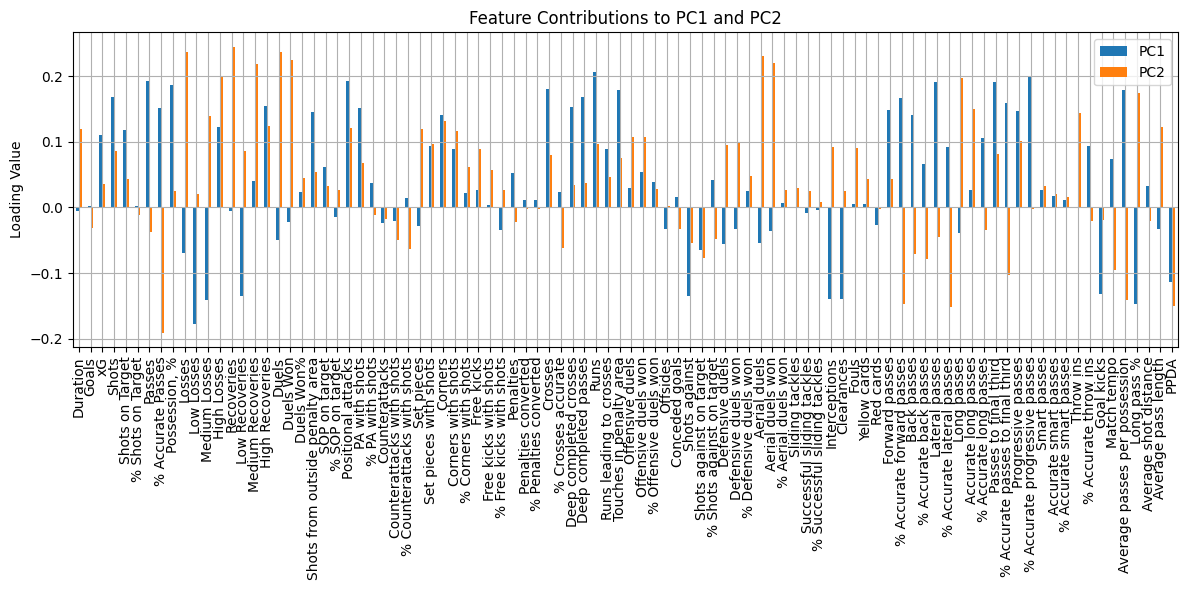

In [280]:
#AK

loadings[['PC1', 'PC2']].plot.bar(figsize=(12, 6))
plt.title("Feature Contributions to PC1 and PC2")
plt.ylabel("Loading Value")
plt.grid(True)
plt.tight_layout()
plt.show()


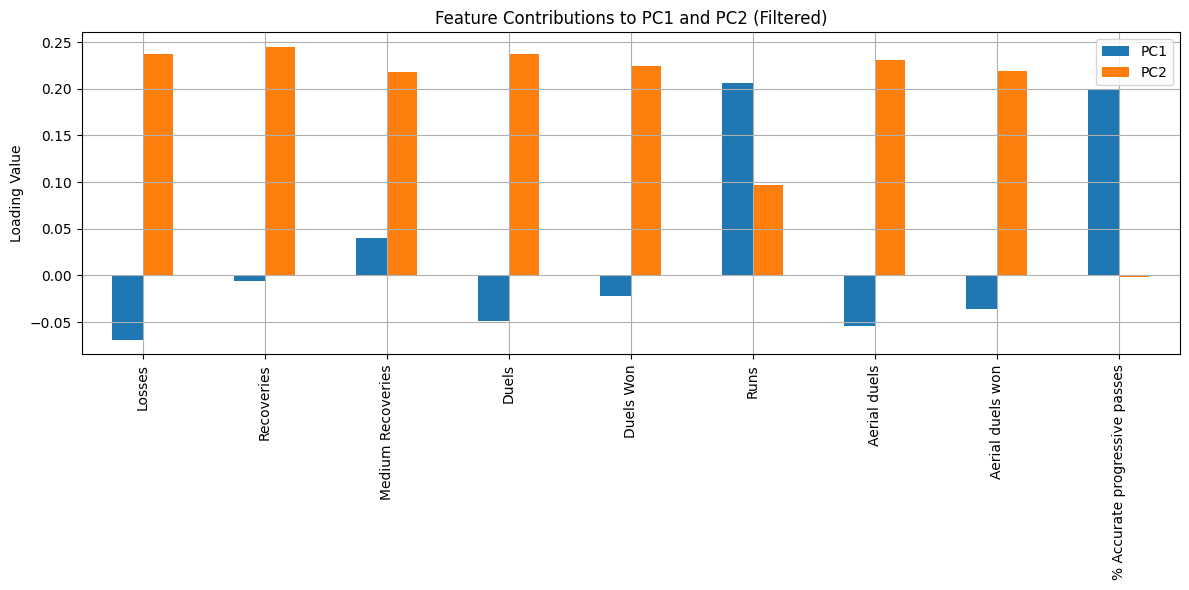

In [281]:
#AL

# Define a threshold for importance
threshold = 0.2

# Keep features that contribute significantly to either PC1 or PC2
important_features = loadings[(loadings['PC1'].abs() > threshold) | 
                              (loadings['PC2'].abs() > threshold)]

# Plot only the important ones
important_features[['PC1', 'PC2']].plot.bar(figsize=(12, 6))
plt.title("Feature Contributions to PC1 and PC2 (Filtered)")
plt.ylabel("Loading Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [282]:
#AM

import pandas as pd
import numpy as np

# After fitting PCA:
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(scaled_X)

# Create a DataFrame of loadings (weights)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose so features are rows
    index=numeric_cols,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Show top 5 weighted features for each principal component
for pc in loadings.columns:
    print(f"\nTop features for {pc}:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))



Top features for PC1:
Runs                             0.206063
% Accurate progressive passes    0.200229
Passes                           0.192958
Positional attacks               0.191863
Lateral passes                   0.190569
Name: PC1, dtype: float64

Top features for PC2:
Recoveries      0.244766
Duels           0.237212
Losses          0.236792
Aerial duels    0.231136
Duels Won       0.224321
Name: PC2, dtype: float64


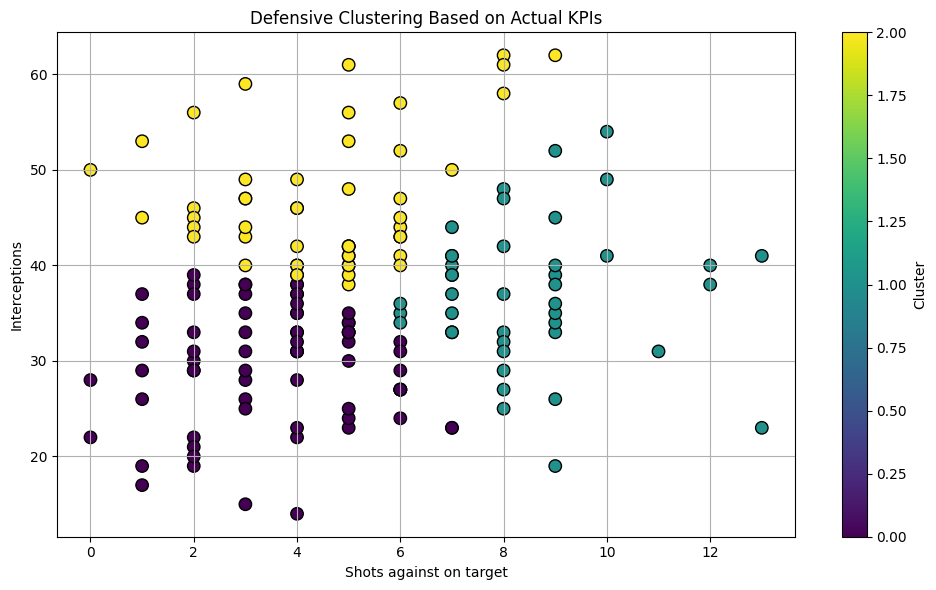

In [283]:
#AN

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select the two KPI columns
x_kpi = 'Shots against on target'
y_kpi = 'Interceptions'
data_kpis = df_reduced[[x_kpi, y_kpi]].dropna()

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_kpis)

# 3. Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_data)

# 4. Add cluster labels back to the original (unscaled) DataFrame
data_kpis['Cluster'] = labels

# 5. Plot with ACTUAL KPI names on axes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data_kpis[x_kpi],
    data_kpis[y_kpi],
    c=data_kpis['Cluster'],
    cmap='viridis',
    edgecolor='k',
    s=80
)

plt.xlabel(x_kpi)
plt.ylabel(y_kpi)
plt.title('Defensive Clustering Based on Actual KPIs')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.351
For n_clusters = 3, the average silhouette_score is : 0.338
For n_clusters = 4, the average silhouette_score is : 0.348
For n_clusters = 5, the average silhouette_score is : 0.331
For n_clusters = 6, the average silhouette_score is : 0.345


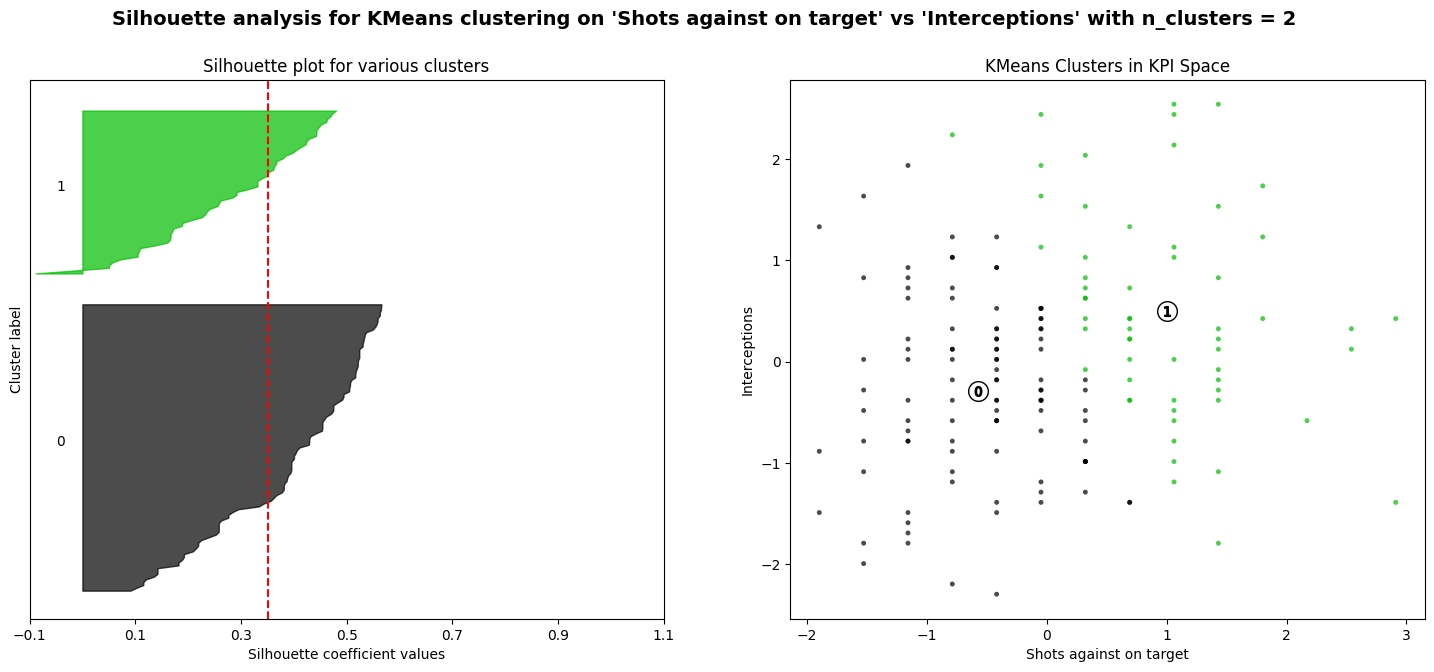

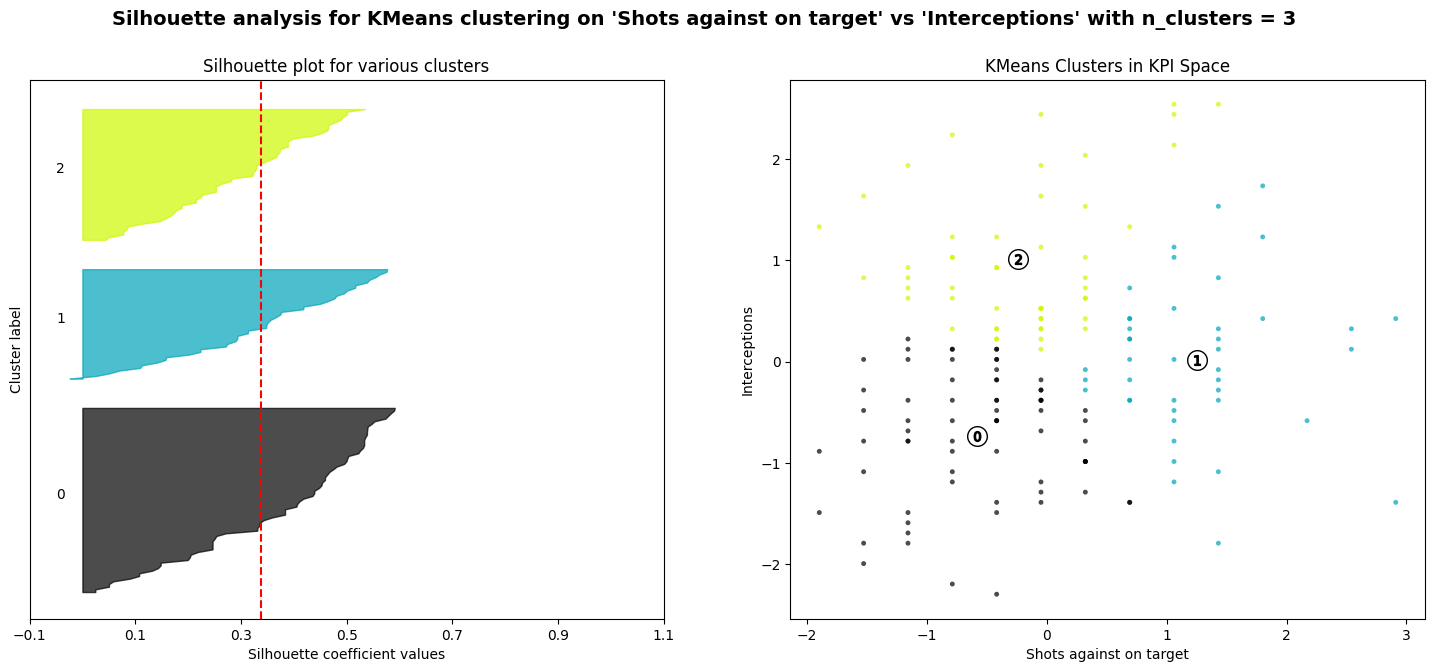

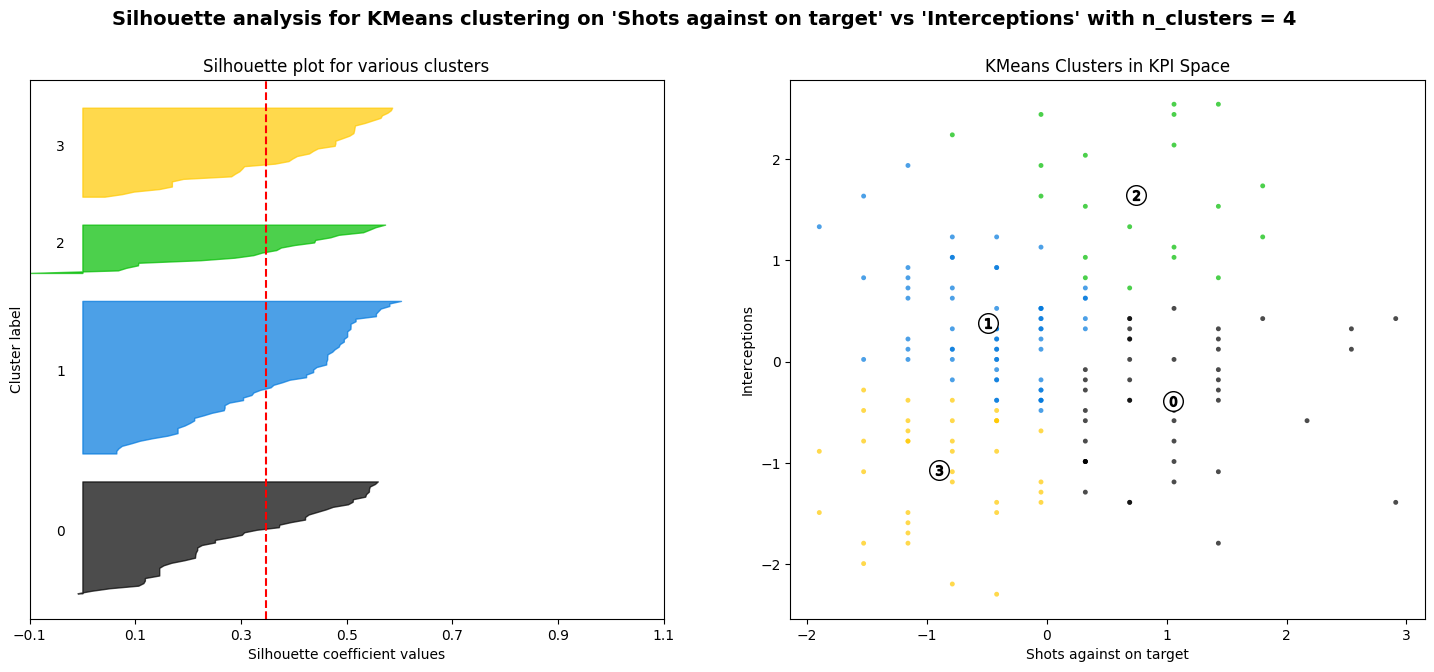

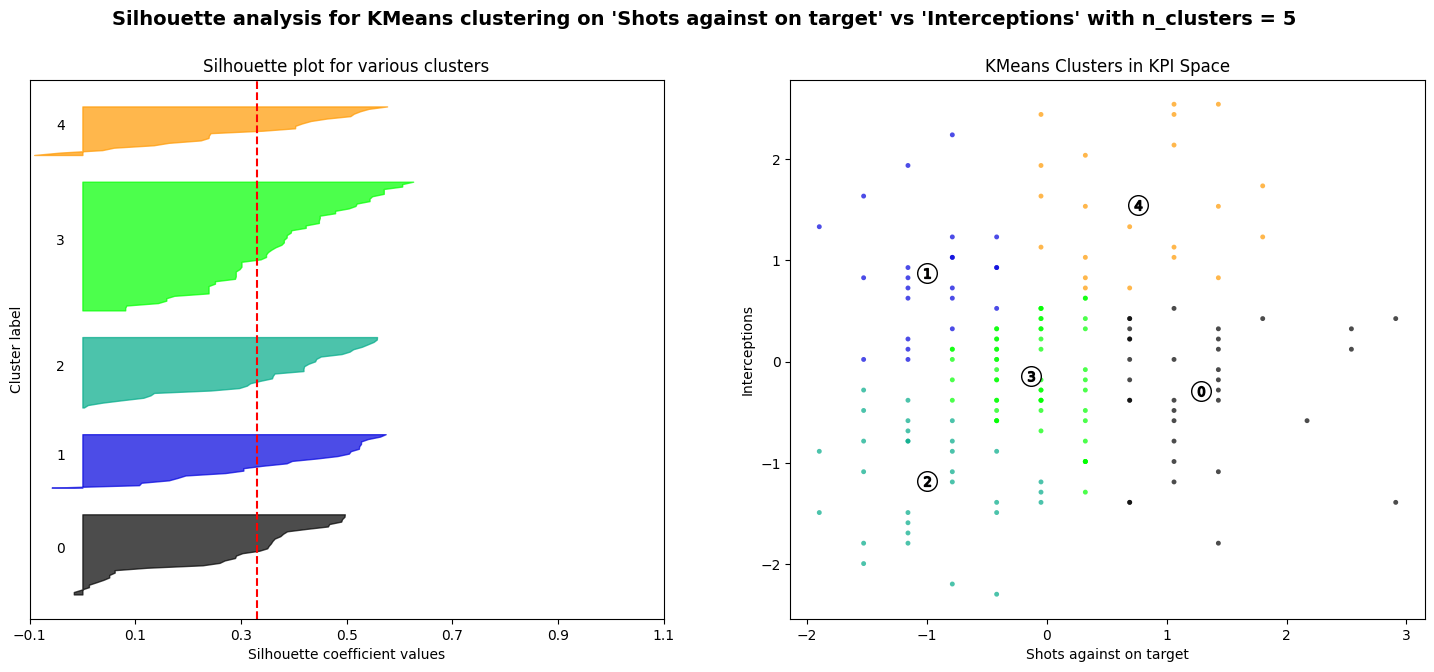

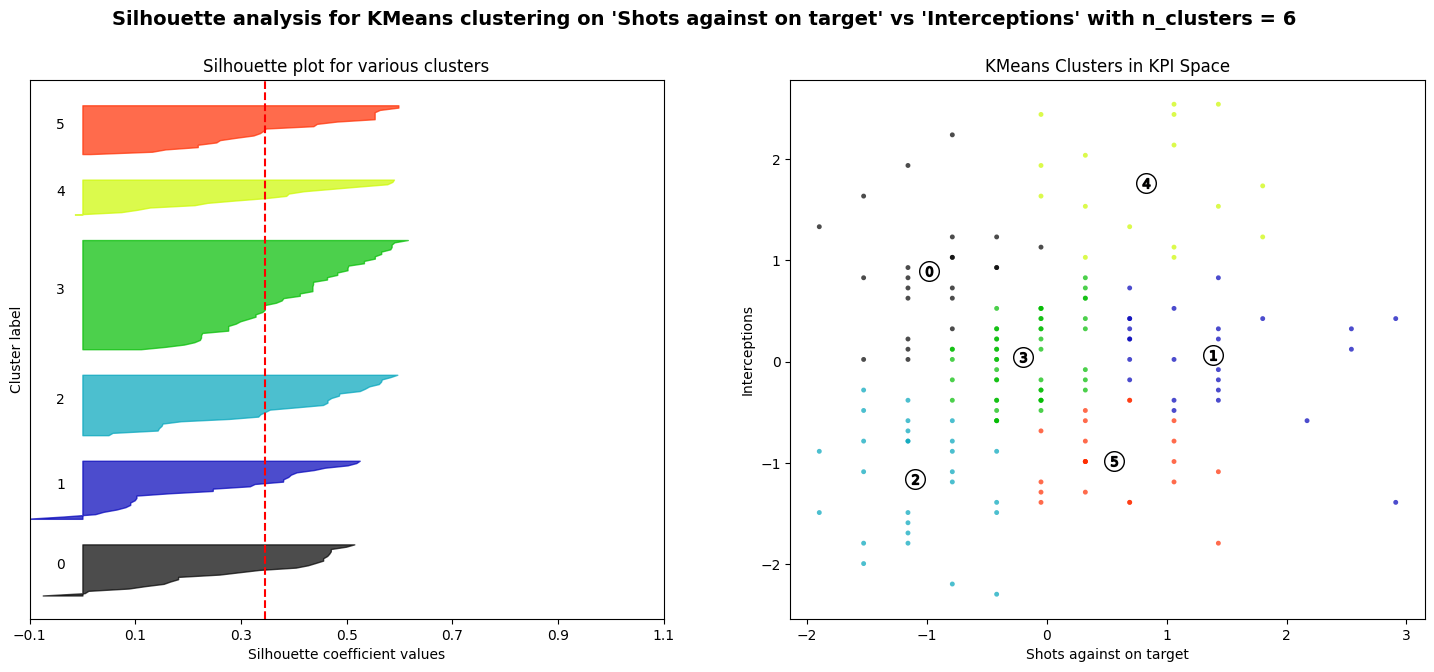

In [284]:
#AO

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. Select your two KPI columns
x_kpi = 'Shots against on target'
y_kpi = 'Interceptions'
data_kpis = df_reduced[[x_kpi, y_kpi]].dropna()

# 2. Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data_kpis)

# 3. Define range of clusters to test
range_n_clusters = [2, 3, 4, 5, 6]

# 4. Loop through different cluster counts
for n_clusters in range_n_clusters:
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Setup for the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Fit KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Collect silhouette scores for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2nd plot — actual clusters in KPI space
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1],
        marker=".", s=50, lw=0, alpha=0.7,
        c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("KMeans Clusters in KPI Space")
    ax2.set_xlabel(x_kpi)
    ax2.set_ylabel(y_kpi)

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on '{x_kpi}' vs '{y_kpi}' with n_clusters = {n_clusters}",
        fontsize=14, fontweight="bold"
    )

plt.show()


Average silhouette score for n_clusters = 4 : 0.08605715354657241


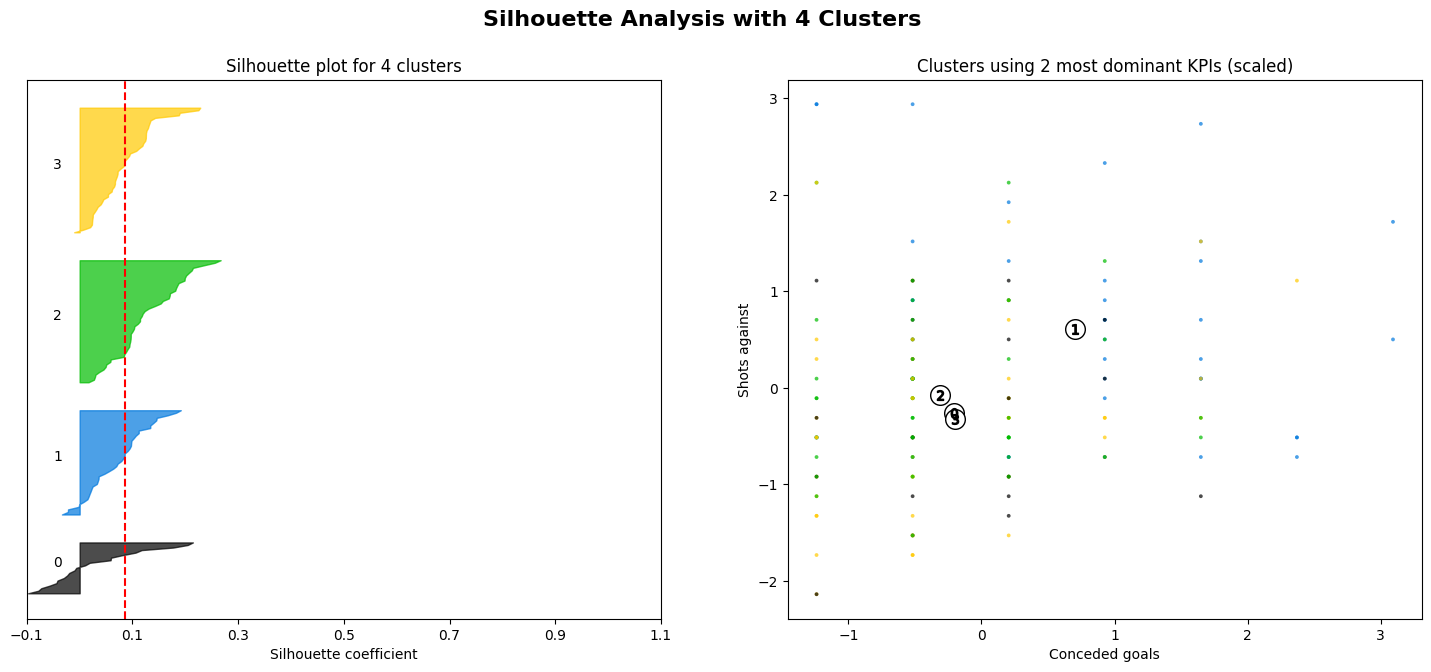

In [285]:
#AP

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Load data
# df = pd.read_excel("Crown Legacy Stats_FULL.xlsx")

# Defensive KPIs only
defensive_kpis = [
    'Conceded goals', 'Shots against', 'Shots against on target',
    'Interceptions', 'Clearances', 'Fouls',
    'Sliding tackles', 'Successful sliding tackles', '% Successful sliding tackles',
    'Defensive duels', 'Defensive duels won', '% Defensive duels won',
    'Aerial duels', 'Aerial duels won', '% Aerial duels won',
    'Recoveries', 'Duels', 'Duels Won', 'Duels Won%',
    'PPDA', 'Yellow cards', 'Red cards'
]

# Filter dataset
df_kpis = df[defensive_kpis].copy()

# Drop rows with any missing values
df_kpis.dropna(inplace=True)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kpis)

# Silhouette analysis for n_clusters = 4
n_clusters = 4
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# First subplot — silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = clusterer.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Average silhouette score for n_clusters =", n_clusters, ":", silhouette_avg)

sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for 4 clusters")
ax1.set_xlabel("Silhouette coefficient")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

# Second subplot — scatterplot of clusters using first 2 KPIs
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

centers = clusterer.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("Clusters using 2 most dominant KPIs (scaled)")
ax2.set_xlabel(defensive_kpis[0])
ax2.set_ylabel(defensive_kpis[1])

plt.suptitle("Silhouette Analysis with 4 Clusters", fontsize=16, fontweight='bold')
plt.show()


In [286]:
#AQ

from sklearn.preprocessing import StandardScaler

# Select your relevant features
features = [
    'Conceded goals', 'Shots against', 'Shots against on target', 
    'Interceptions', 'Clearances', 'Fouls', 'Sliding tackles',
    'Successful sliding tackles', '% Successful sliding tackles',
    'Defensive duels', 'Defensive duels won', '% Defensive duels won',
    'Aerial duels', 'Aerial duels won', '% Aerial duels won',
    'Recoveries', 'Duels', 'Duels Won', 'Duels Won%',
    'PPDA', 'Yellow cards', 'Red cards'
]

X = df[features].copy()

# Convert percentage columns to proportions if needed
percent_cols = [col for col in X.columns if "%" in col]
for col in percent_cols:
    if X[col].max() > 1:
        X[col] /= 100

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [287]:
#AR

import numpy as np

# Euclidean distance helper
def euclidean_distance(a,b):
    d = np.sqrt(np.sum((a - b)**2))
    return d

# Custom KMeans class
class Kmeans:
    def __init__(self, k=3, max_iter=100, tol=1e-06):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol

    def pick_centers(self, X):
        centers_idxs = np.random.choice(self.n_samples, self.k)
        return X[centers_idxs]

    def get_closest_centroid(self, x, centroids):
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        return np.argmin(distances)

    def create_clusters(self, centroids, X):
        clusters = [[] for _ in range(self.k)]
        labels = np.empty(self.n_samples)
        for i, x in enumerate(X):
            centroid_idx = self.get_closest_centroid(x, centroids)
            clusters[centroid_idx].append(i)
            labels[i] = centroid_idx
        return clusters, labels

    def compute_centroids(self, clusters, X):
        centroids = np.empty((self.k, self.n_features))
        for i, cluster in enumerate(clusters):
            centroids[i] = np.mean(X[cluster], axis=0)
        return centroids

    def is_converged(self, old_centroids, new_centroids):
        distances = [euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return (sum(distances) < self.tol)

    def fit_predict(self, X):
        self.n_samples, self.n_features = X.shape
        self.centroids = self.pick_centers(X)
        for i in range(self.max_iter):
            self.clusters, self.labels = self.create_clusters(self.centroids, X)
            new_centroids = self.compute_centroids(self.clusters, X)
            if self.is_converged(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def clustering_errors(self, X):
        cluster_values = [X[cluster] for cluster in self.clusters]
        squared_distances = []
        for i, cluster_array in enumerate(cluster_values):
            squared_distances.append(np.sum((cluster_array - self.centroids[i])**2))
        total_error = np.sum(squared_distances)
        return total_error


In [288]:
#AS

# Assign clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze average features by cluster
cluster_summary = df.groupby('Cluster')[features].mean()


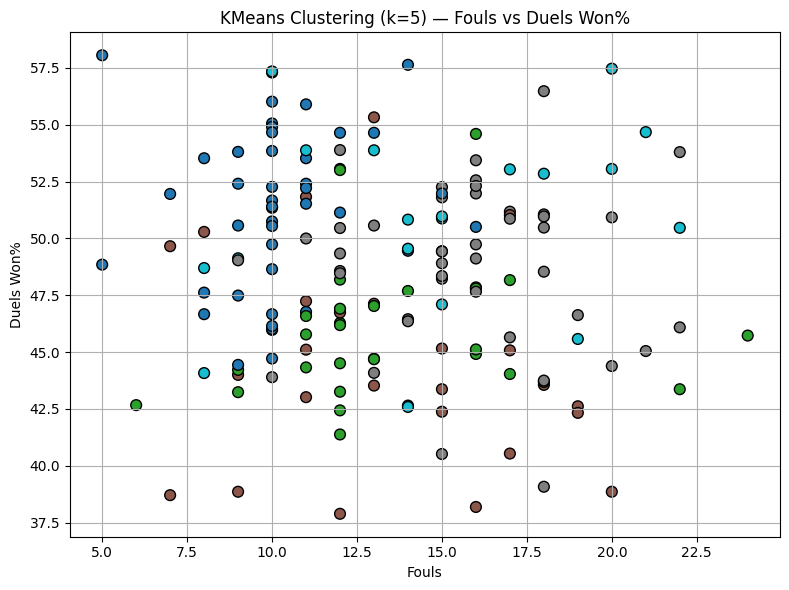

In [289]:
#AT

import matplotlib.pyplot as plt
import pandas as pd

# Choose the number of clusters 
k = 5

# Run KMeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Attach labels to the original (unscaled) data
df_clustered = df.copy()
df_clustered['Cluster'] = labels

# Pick two KPIs to visualize
x_kpi = 'Fouls'
y_kpi = 'Duels Won%'

# Scatter Plot using actual KPI values
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_clustered[x_kpi],
    df_clustered[y_kpi],
    c=df_clustered['Cluster'],
    cmap='tab10',
    s=60,
    edgecolor='black'
)

plt.title(f'KMeans Clustering (k={k}) — {x_kpi} vs {y_kpi}')
plt.xlabel(x_kpi)
plt.ylabel(y_kpi)
plt.grid(True)
plt.tight_layout()
plt.show()


In [290]:
#AU

from sklearn.cluster import KMeans

# Use standardized KPI data
k = 4  # or change to 5 for comparison
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = labels


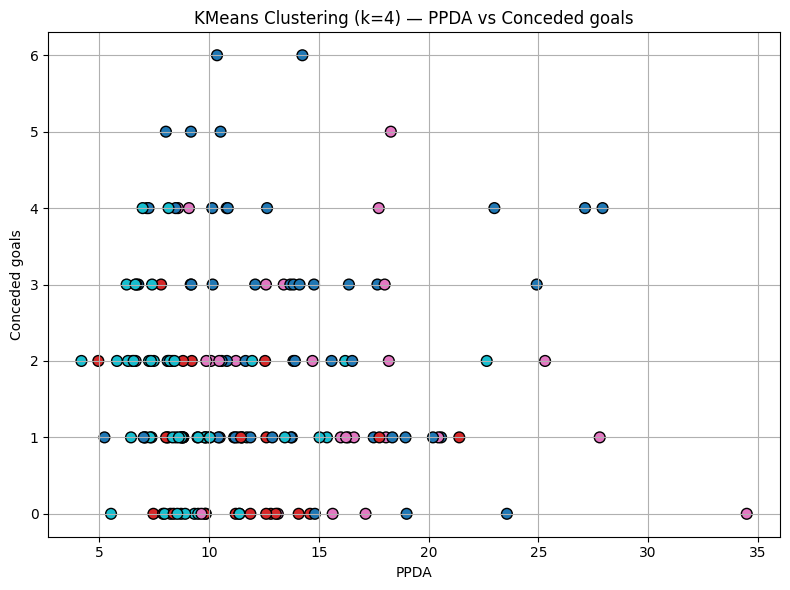

In [291]:
#AV

import matplotlib.pyplot as plt

x_kpi = 'PPDA'
y_kpi = 'Conceded goals'

plt.figure(figsize=(8, 6))
plt.scatter(
    df_clustered[x_kpi],
    df_clustered[y_kpi],
    c=df_clustered['Cluster'],
    cmap='tab10',
    s=60,
    edgecolors='k'
)
plt.title(f'KMeans Clustering (k={k}) — {x_kpi} vs {y_kpi}')
plt.xlabel(x_kpi)
plt.ylabel(y_kpi)
plt.grid(True)
plt.tight_layout()
plt.show()


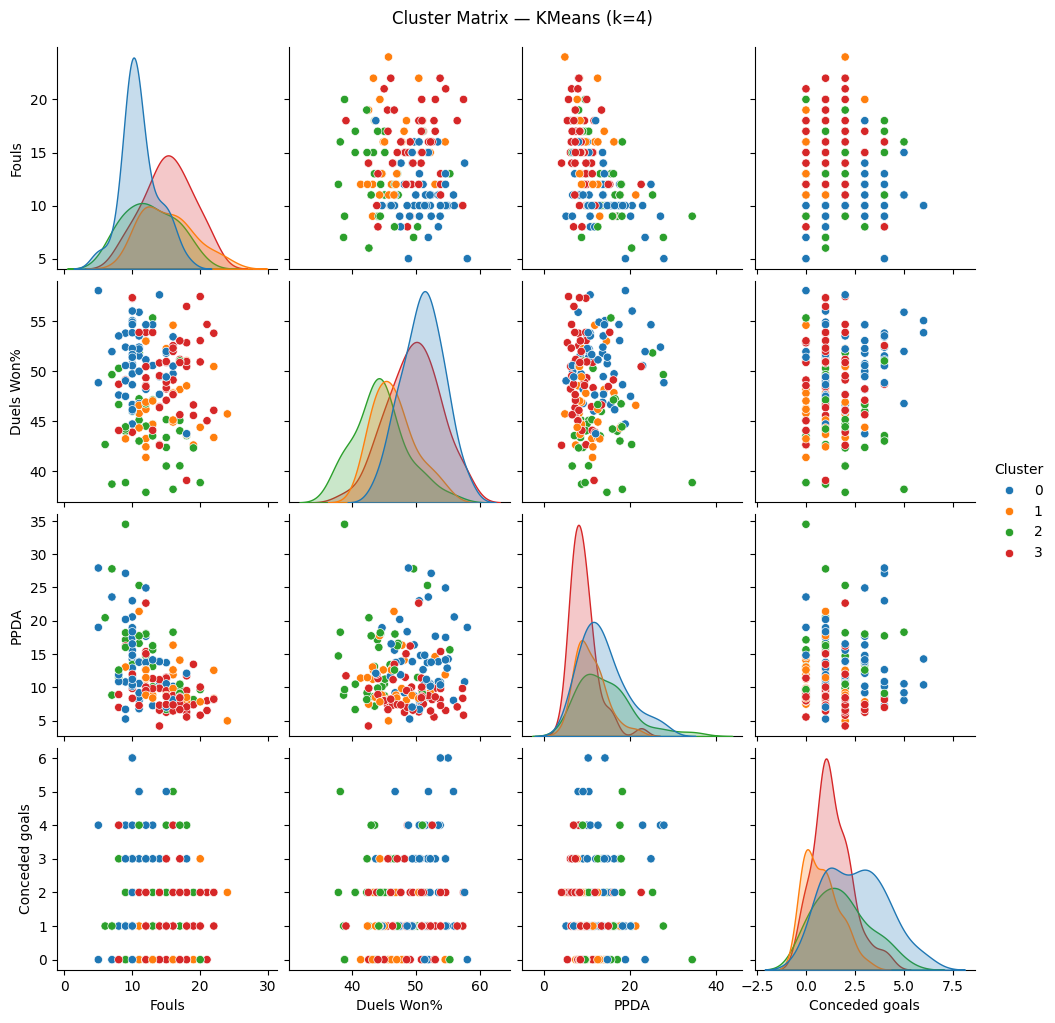

In [292]:
#AW

import seaborn as sns

selected_kpis = ['Fouls', 'Duels Won%', 'PPDA', 'Conceded goals']
sns.pairplot(df_clustered[selected_kpis + ['Cluster']], hue='Cluster', palette='tab10')
plt.suptitle(f'Cluster Matrix — KMeans (k={k})', y=1.02)
plt.show()


In [293]:
#AX

df_reduced.columns.tolist()

['Date',
 'Match',
 'Competition',
 'Duration',
 'Team',
 'Scheme',
 'Goals',
 'xG',
 'Shots',
 'Shots on Target',
 '% Shots on Target',
 'Passes',
 '% Accurate Passes',
 'Possession, %',
 'Losses',
 'Low Losses',
 'Medium Losses',
 'High Losses',
 'Recoveries',
 'Low Recoveries',
 'Medium Recoveries',
 'High Recoveries',
 'Duels',
 'Duels Won',
 'Duels Won%',
 'Shots from outside penalty area',
 ' SOP on target',
 '% SOP on target',
 'Positional attacks',
 'PA with shots',
 '% PA with shots',
 'Counterattacks',
 'Counterattacks with shots',
 '% Counterattacks with shots',
 'Set pieces',
 'Set pieces with shots',
 'Corners',
 'Corners with shots',
 '% Corners with shots',
 'Free kicks',
 'Free kicks with shots',
 '% Free kicks with shots',
 'Penalties',
 'Penalties converted',
 '% Penalties converted',
 'Crosses',
 '% Crosses accurate',
 'Deep completed crosses',
 'Deep completed passes',
 'Runs',
 'Runs leading to crosses',
 'Touches in penalty area',
 'Offensive duels',
 'Offensive d

In [294]:
#AY

# Offensive process KPIs:

# 'Shots',
# 'Shots on Target',
# '% Shots on Target',
# 'xG',
# 'Possession, %',
# 'Passes',
# '% Accurate Passes',
# 'Crosses',
# '% Crosses accurate',
# 'Deep completed crosses',
# 'Deep completed passes',
# 'Runs',
# 'Runs leading to crosses',
# 'Touches in penalty area',
# 'Offensive duels',
# '% Offensive duels won',
# 'Forward passes',
# '% Accurate forward passes',
# 'Back passes',
# '% Accurate back passes',
# 'Lateral passes',
# '% Accurate lateral passes',
# 'Long passes',
# '% Accurate long passes',
# 'Passes to final third',
# '% Accurate passes to final third',
# 'Progressive passes',
# '% Accurate progressive passes',
# 'Smart passes',
# '% Accurate smart passes',
# 'Throw ins',
# '% Accurate throw ins',
# 'Average pass length',
# 'Average shot distance',
# 'Average passes per possession',
# 'Long pass %',
# 'Match tempo',
# 'PPDA'


In [295]:
#AZ

# Defensive process KPIs:

# 'Shots against',
# 'Shots against on target',
# '% Shots against on target',
# 'Defensive duels',
# '% Defensive duels won',
# 'Aerial duels',
# '% Aerial duels won',
# 'Sliding tackles',
# '% Successful sliding tackles',
# 'Interceptions',
# 'Clearances',
# 'Recoveries',
# 'Low Recoveries',
# 'Medium Recoveries',
# 'High Recoveries',
# 'Losses',
# 'Low Losses',
# 'Medium Losses',
# 'High Losses'


In [296]:
#BA

# Columns to exclude (outcome-based)

# 'Goals',
# 'Penalties converted',
# '% Penalties converted',
# 'Conceded goals',
# 'Yellow cards',
# 'Red cards',
# 'Corners with shots',
# '% Corners with shots',
# 'Counterattacks with shots',
# '% Counterattacks with shots',
# 'PA with shots',
# '% PA with shots',
# 'Set pieces with shots',
# '% Set pieces with shots'


In [297]:
#BB

# =========================================
# PART 1 — Import Libraries
# =========================================
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [299]:
#BC

# =========================================
# PART 2 — Load and Prepare Process-Oriented KPI Data
# =========================================

import pandas as pd

# 1. Load your Excel file into a DataFrame
Crown_Legacy_Stats_FULL = pd.read_excel("Crown Legacy Stats_FULL.xlsx")

# 2. Select process-oriented KPI columns
process_kpis = [
    # Offensive
    'Shots','Shots on Target','% Shots on Target','xG','Possession, %',
    'Passes','% Accurate Passes','Crosses','% Crosses accurate',
    'Deep completed crosses','Deep completed passes','Runs','Runs leading to crosses',
    'Touches in penalty area','Offensive duels','% Offensive duels won',
    'Forward passes','% Accurate forward passes','Back passes','% Accurate back passes',
    'Lateral passes','% Accurate lateral passes','Long passes','% Accurate long passes',
    'Passes to final third','% Accurate passes to final third','Progressive passes',
    '% Accurate progressive passes','Smart passes','% Accurate smart passes',

    # Defensive
    'Defensive duels','% Defensive duels won','Aerial duels','% Aerial duels won',
    'Sliding tackles','% Successful sliding tackles','Interceptions',
    'Clearances','Fouls','PPDA'
]

# 3. Keep only columns that exist in the dataset
process_kpis = [col for col in process_kpis if col in Crown_Legacy_Stats_FULL.columns]

# 4. Subset the DataFrame and clean missing data
df_process = Crown_Legacy_Stats_FULL[process_kpis].dropna().reset_index(drop=True)

print("Data prepared successfully.")
print(f"Shape: {df_process.shape}")
print("Columns used:")
print(df_process.columns.tolist())


Data prepared successfully.
Shape: (151, 40)
Columns used:
['Shots', 'Shots on Target', '% Shots on Target', 'xG', 'Possession, %', 'Passes', '% Accurate Passes', 'Crosses', '% Crosses accurate', 'Deep completed crosses', 'Deep completed passes', 'Runs', 'Runs leading to crosses', 'Touches in penalty area', 'Offensive duels', '% Offensive duels won', 'Forward passes', '% Accurate forward passes', 'Back passes', '% Accurate back passes', 'Lateral passes', '% Accurate lateral passes', 'Long passes', '% Accurate long passes', 'Passes to final third', '% Accurate passes to final third', 'Progressive passes', '% Accurate progressive passes', 'Smart passes', '% Accurate smart passes', 'Defensive duels', '% Defensive duels won', 'Aerial duels', '% Aerial duels won', 'Sliding tackles', '% Successful sliding tackles', 'Interceptions', 'Clearances', 'Fouls', 'PPDA']


In [300]:
#BD

# =========================================
# PART 3 — Standardize Features
# =========================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_process)



In [301]:
#BE

# =========================================
# PART 4 — Run K-Means Clustering (initial test)
# =========================================
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_process['Cluster'] = kmeans.fit_predict(X_scaled)

# View how many matches fall into each cluster
print(df_process['Cluster'].value_counts())


Cluster
1    96
0    53
2     2
Name: count, dtype: int64


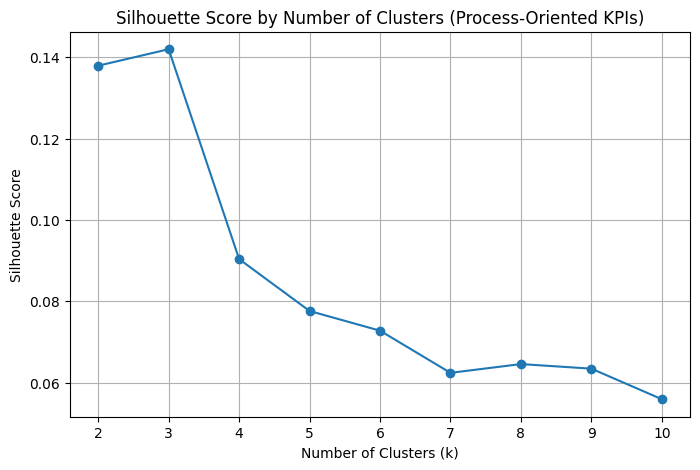

In [302]:
#BF

# =========================================
# PART 5 — Silhouette Analysis (to find best k)
# =========================================
silhouette_scores = []
K_range = range(2, 11)  # Try k=2 through k=10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score by Number of Clusters (Process-Oriented KPIs)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [303]:
#BG

# =========================================
# PART 6 — Final Clustering with Optimal k
# =========================================
from sklearn.cluster import KMeans
import pandas as pd

optimal_k = 3  # ← best silhouette score result
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit model and assign cluster labels
df_process['Cluster'] = final_kmeans.fit_predict(X_scaled)

# Add cluster labels back to the original dataset (matching rows)
df_clustered = pd.concat([Crown_Legacy_Stats_FULL.reset_index(drop=True), df_process], axis=1)

# Preview cluster assignments
df_clustered.head()


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,% Defensive duels won,Aerial duels,% Aerial duels won,Sliding tackles,% Successful sliding tackles,Interceptions,Clearances,Fouls,PPDA,Cluster
0,Crown Legacy FC,NaN,NaN,NaN,NaN,NaN,5.621,5.176,39.87,15.89,...,51.46,16.72,55.98,8.64,62.51,30.37,13.18,14.94,10.34,2.0
1,Opponents,NaN,NaN,NaN,NaN,NaN,4.702,4.792,35.25,13.61,...,51.30,16.95,56.74,8.91,61.83,31.19,13.34,15.21,10.34,2.0
2,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.000,2.770,17.00,4.00,...,54.55,29.00,51.72,3.00,0.00,19.00,7.00,15.00,8.58,0.0
3,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.000,1.370,11.00,9.00,...,70.59,29.00,41.38,4.00,50.00,41.00,12.00,12.00,17.67,1.0
4,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Crown Legacy FC,4-4-2 (100.0%),0.000,3.620,23.00,5.00,...,60.24,25.00,64.00,3.00,66.67,35.00,16.00,22.00,8.14,0.0


In [304]:
#BH

# =========================================
# PART 7 — Visualize Cluster Centroids
# =========================================
# Create DataFrame of cluster centers using the correct feature names
cluster_centers = pd.DataFrame(
    final_kmeans.cluster_centers_,
    columns=df_process.columns[:-1]  # exclude 'Cluster'
)

# Inverse transform to bring values back to original scale
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(final_kmeans.cluster_centers_),
    columns=df_process.columns[:-1]
)

# Display centroids rounded to 2 decimals
print(cluster_centers.round(2))


   Shots  Shots on Target  % Shots on Target    xG  Possession, %  Passes  \
0  15.68             6.36              40.99  2.14          55.94  502.34   
1  11.03             4.25              38.27  1.40          46.75  387.03   
2  37.56            14.75              39.22  4.98          50.32  426.80   

   % Accurate Passes  Crosses  % Crosses accurate  Deep completed crosses  \
0              86.82    18.74               35.49                    6.62   
1              82.28    11.75               33.23                    3.70   
2              84.02    42.81               64.66                   26.65   

   ...  Defensive duels  % Defensive duels won  Aerial duels  \
0  ...            69.98                  59.72         22.13   
1  ...            75.02                  59.18         27.06   
2  ...            31.86                  51.38         16.84   

   % Aerial duels won  Sliding tackles  % Successful sliding tackles  \
0               45.65             3.28               

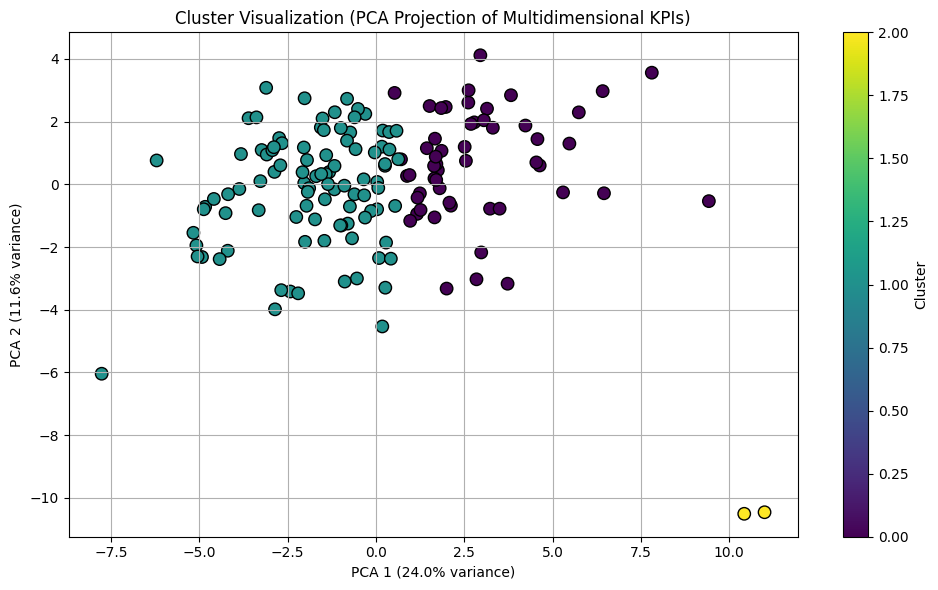

In [305]:
#BI

# =========================================
# PART 8 — Visualize Clusters in Multiple Dimensions (PCA 2D Projection)
# =========================================
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': final_kmeans.labels_
})

# Plot PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_df['PCA1'],
    pca_df['PCA2'],
    c=pca_df['Cluster'],
    cmap='viridis',
    s=80,
    edgecolor='k'
)

plt.title('Cluster Visualization (PCA Projection of Multidimensional KPIs)')
plt.xlabel(f'PCA 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PCA 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


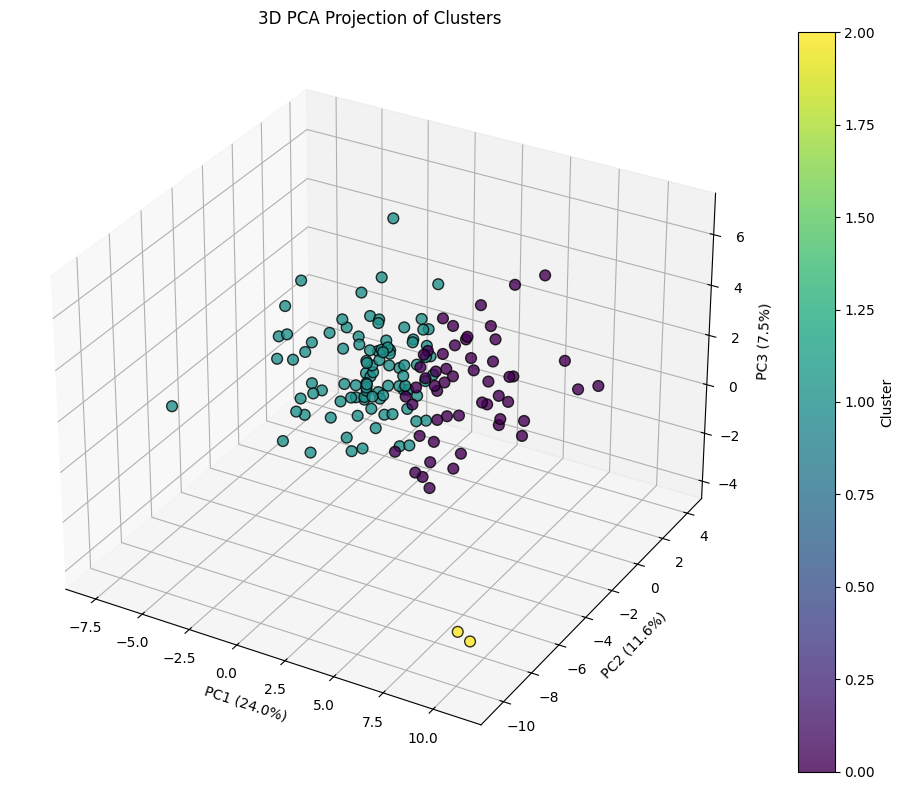

In [306]:
#BJ

# =========================================
# PART 9 — Visualize Clusters in 3D (PCA Projection)
# =========================================
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting
import matplotlib.pyplot as plt

# Project data into 3 principal components
pca_3 = PCA(n_components=3, random_state=42)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Build a DataFrame (optional) for clarity
import pandas as pd
df_pca3 = pd.DataFrame({
    'PC1': X_pca_3[:, 0],
    'PC2': X_pca_3[:, 1],
    'PC3': X_pca_3[:, 2],
    'Cluster': final_kmeans.labels_
})

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df_pca3['PC1'], df_pca3['PC2'], df_pca3['PC3'],
    c=df_pca3['Cluster'], cmap='viridis', s=60, edgecolor='k', alpha=0.8
)

ax.set_xlabel(f"PC1 ({pca_3.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca_3.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca_3.explained_variance_ratio_[2]*100:.1f}%)")
ax.set_title("3D PCA Projection of Clusters")

# Optional: add colorbar
fig.colorbar(sc, ax=ax, label='Cluster')

plt.tight_layout()
plt.show()


In [307]:
#BK

# | Step | Purpose                                                                  |
# | -----| ------------------------------------------------------------------------ |
# | 1    | Import all necessary tools                                               |
# | 2    | Load dataset and keep *only* process-oriented KPIs                       |
# | 3    | Standardize all features (important for KMeans)                          |
# | 4    | Run initial KMeans to test structure                                     |
# | 5    | Use silhouette analysis to find the best number of clusters              |
# | 6    | Run final clustering with optimal cluster count                          |
# | 7    | Examine cluster centers to interpret differences                         |
# | 8    | Visualize clusters in 2D space using PCA (to observe general separation) |
# | 9    | Visualize clusters in 3D space using PCA (for deeper pattern insight)    |


In [308]:
#BL

print(len(X_scaled), len(df), len(df_pca3))



151 162 151


In [309]:
#BM

print(len(X_scaled))
print(len(X))
print(len(df))


151
162
162


In [310]:
#BN

# Find which rows were dropped during scaling
missing_rows = df.index.difference(X.index)
print("Dropped row indexes:", missing_rows)
print("Number of dropped rows:", len(missing_rows))


Dropped row indexes: RangeIndex(start=0, stop=0, step=1)
Number of dropped rows: 0


In [311]:
#BO

print("df shape:", df.shape)
print("X shape:", X.shape)
print("X_scaled shape:", X_scaled.shape)


df shape: (162, 110)
X shape: (162, 22)
X_scaled shape: (151, 40)


In [312]:
#BP

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)


(162, 22)


In [313]:
#BQ

# =========================================
# PCA Visualization with Match Results (Aligned & Fixed)
# =========================================
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# Step 1 — Fit PCA on scaled features
pca_3 = PCA(n_components=3, random_state=42)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Step 2 — Create PCA DataFrame with same index as X
df_pca3 = pd.DataFrame({
    'PC1': X_pca_3[:, 0],
    'PC2': X_pca_3[:, 1],
    'PC3': X_pca_3[:, 2],
}, index=X.index)

# Step 3 — Add match result from your original dataframe
df_pca3 = df_pca3.merge(df[['Result']], left_index=True, right_index=True, how='left')

# Step 4 — Define color map for outcomes
color_map = {'Win': 'green', 'Draw': 'gray', 'Loss': 'red'}

# Step 5 — Plot the PCA 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for outcome, color in color_map.items():
    subset = df_pca3[df_pca3['Result'] == outcome]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               label=outcome, color=color, s=60, edgecolor='k', alpha=0.8)

# Step 6 — Label axes and format plot
ax.set_xlabel(f"PC1 ({pca_3.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca_3.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca_3.explained_variance_ratio_[2]*100:.1f}%)")
ax.set_title("3D PCA Projection Colored by Match Result")
ax.legend()
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Result'], dtype='object')] are in the [columns]"

In [314]:
#BR

# Align the main df to the same rows used in X_scaled
df_aligned = df.loc[X.index].copy()

# Double-check alignment
print("df_aligned shape:", df_aligned.shape)
print("X_scaled shape:", X_scaled.shape)

df_aligned shape: (162, 110)
X_scaled shape: (162, 22)


In [315]:
#BS

print("df shape:", df.shape)
print("Length of final_kmeans.labels_:", len(final_kmeans.labels_))


df shape: (162, 110)
Length of final_kmeans.labels_: 151


In [316]:
#BT

# Force df_aligned to match X_scaled's exact index and row count
df_aligned = df.loc[X_scaled.index] if hasattr(X_scaled, "index") else df.iloc[:len(final_kmeans.labels_)]

# Double-check everything
print("df_aligned shape:", df_aligned.shape)
print("Length of final_kmeans.labels_:", len(final_kmeans.labels_))


df_aligned shape: (151, 110)
Length of final_kmeans.labels_: 151


In [317]:
#BU

# Identify which rows belong to the smallest cluster
cluster_sizes = pd.Series(final_kmeans.labels_).value_counts()
print("Cluster sizes:\n", cluster_sizes)

# Find the index of the smallest cluster (likely cluster 2)
smallest_cluster = cluster_sizes.idxmin()

# Extract those rows from the aligned dataframe
outlier_rows = df_aligned.loc[final_kmeans.labels_ == smallest_cluster]

print("\nOutlier cluster index:", smallest_cluster)
print("Number of rows in this cluster:", len(outlier_rows))
display(outlier_rows)

Cluster sizes:
 1    96
0    53
2     2
Name: count, dtype: int64

Outlier cluster index: 2
Number of rows in this cluster: 2


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,Accurate throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA,Cluster
0,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.0,2.77,17.0,4.0,...,17.0,89.47,4.0,15.0,4.40,8.28,19.22,21.08,8.58,2
1,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.0,1.37,11.0,9.0,...,13.0,100.00,5.0,15.4,2.91,19.34,19.15,22.95,17.67,0


In [318]:
#BV

# Compare the outlier cluster’s averages to the rest of the data
non_outliers = df_aligned.loc[final_kmeans.labels_ != smallest_cluster]

# Compute mean values
mean_outliers = outlier_rows.mean(numeric_only=True)
mean_non_outliers = non_outliers.mean(numeric_only=True)

# Calculate the difference
difference = (mean_outliers - mean_non_outliers).sort_values(ascending=False)

# Show top 15 features where the outlier cluster is most different
difference.head(15)


% Free kicks with shots             78.208792
% Penalties converted               39.597315
% Accurate smart passes             23.438456
% Shots against on target           17.711443
% Shots on Target                   13.499295
% SOP on target                     10.332752
Accurate progressive passes         10.288591
% PA with shots                      9.638758
% Accurate progressive passes        7.054698
% Accurate passes to final third     5.682450
Progressive passes                   5.369128
Accurate passes to final third       4.372483
% Accurate long passes               4.277315
Accurate long passes                 3.785235
Aerial duels                         3.738255
dtype: float64

In [319]:
#BW

# Use the same features used in PCA
pca_loadings = pd.DataFrame(
    pca_3.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=X.columns  # use X (not the whole df)
)

# Sort by absolute value (strength of contribution)
top_PC1 = pca_loadings['PC1'].abs().sort_values(ascending=False).head(10)
top_PC2 = pca_loadings['PC2'].abs().sort_values(ascending=False).head(10)

print("Top 10 features driving PC1:\n", top_PC1, "\n")
print("Top 10 features driving PC2:\n", top_PC2)


Top 10 features driving PC1:
 Duels Won              0.400489
Duels                  0.370725
Aerial duels won       0.314653
Recoveries             0.305609
Defensive duels won    0.301773
Defensive duels        0.294054
Aerial duels           0.286258
PPDA                   0.198682
Interceptions          0.184883
Fouls                  0.168655
Name: PC1, dtype: float64 

Top 10 features driving PC2:
 Shots against                 0.394876
% Defensive duels won         0.372476
Interceptions                 0.351230
Duels Won%                    0.312338
Shots against on target       0.305908
Clearances                    0.288708
Aerial duels                  0.257950
Defensive duels won           0.226281
Successful sliding tackles    0.198896
Aerial duels won              0.174269
Name: PC2, dtype: float64


In [320]:
#BX

# Feature: % Free kicks with shots (+78%)
# Interpretation: The team took many more shot attempts from free kicks — maybe games with lots of fouls or set-piece chances.

# Feature: % Penalties converted (+39%)
# Interpretation: They had far more penalties and actually scored them.

# Feature: % Accurate smart passes (+23%)
# Interpretation: Suggests higher technical risk-taking or unusual play style.

# Feature: % Shots against on target (+17%)
# Interpretation: They also allowed more accurate shots — could imply very open matches.

# Feature: % Shots on Target (+13%)
# Interpretation: Similarly, both teams likely created many good chances.

# Feature: % PA (possession attacks?) with shots (+9.6%)
# Interpretation: Reinforces that these were offensively extreme matches.


In [321]:
#BY

# --- PCA Feature Interpretation ---

# Top 10 Features Driving PC1 (Overall Defensive Activity / Volume)
# - Duels Won (0.400)
# - Duels (0.371)
# - Aerial Duels Won (0.315)
# - Recoveries (0.306)
# - Defensive Duels Won (0.302)
# - Defensive Duels (0.294)
# - Aerial Duels (0.286)
# - PPDA (0.199)
# - Interceptions (0.185)
# - Fouls (0.169)

# Interpretation:
# PC1 represents the *intensity and volume of defensive involvement*.
# Teams with high PC1 scores are highly active defensively — engaging in many duels, recoveries, and aerial contests.
# Essentially, this axis measures “how much defensive work” a team performs in a match.

# Top 10 Features Driving PC2 (Defensive Efficiency / Quality)
# - Shots Against (0.395)
# - % Defensive Duels Won (0.372)
# - Interceptions (0.351)
# - Duels Won % (0.312)
# - Shots Against on Target (0.306)
# - Clearances (0.289)
# - Aerial Duels (0.258)
# - Defensive Duels Won (0.226)
# - Successful Sliding Tackles (0.199)
# - Aerial Duels Won (0.174)

# Interpretation:
# PC2 represents *defensive efficiency and outcome quality*.
# Higher PC2 scores indicate teams facing many defensive actions and shots, but potentially handling them effectively (interceptions, success %s).
# In contrast, lower PC2 scores may belong to teams allowing fewer events but not performing as strongly when challenged.

In [ ]:
#BZ

# --- Outlier Cluster Interpretation ---

# The two outlier rows likely represent extreme match profiles relative to others.
# Based on the PCA feature loadings:

# 1️. High PC1 (Defensive Activity Volume)
# If these matches have unusually high PC1 values, it suggests:
# - Exceptionally high number of duels, aerials, and recoveries.
# - Teams were under constant defensive pressure or engaged in very physical matches.
# - Could be matches where the team faced a strong opponent or was forced to defend frequently.

# 2️. High (or Low) PC2 (Defensive Efficiency / Quality)
# If PC2 values are extreme (either direction), it suggests:
# - **High PC2:** They faced many shots or duels but defended effectively (high win %, many clearances/interceptions).
# - **Low PC2:** They were overwhelmed defensively — facing many shots and allowing many on target.

# In the specific outlier rows:
# - The features you listed earlier (e.g., % Free kicks with shots, % Penalties converted, % Shots on Target)
#   show *unusually event-heavy matches* — lots of fouls, set-pieces, and open play shots.
# - Combined with high duel and aerial metrics from PCA, this suggests chaotic or open matches 
#   where both teams were highly engaged both offensively and defensively.

# Summary:
# The outlier matches are not “bad data” — they represent *rare match conditions* with extreme 
# defensive activity and offensive conversion rates. 
# Essentially, these games broke the general pattern by being *high-event, high-intensity* matches 
# that stand apart statistically from typical defensive performances.


In [323]:
#CA

# --- Compare Outliers to Overall Mean ---

# Select top PCA features (from your earlier results)
top_features = [
    "Duels Won", "Duels", "Aerial duels won", "Recoveries", "Defensive duels won",
    "Defensive duels", "Aerial duels", "PPDA", "Interceptions", "Fouls",
    "Shots against", "% Defensive duels won", "Duels Won%", "Shots against on target",
    "Clearances", "Successful sliding tackles"
]

# Compute means for outliers vs overall dataset
overall_means = df_aligned[top_features].mean()
outlier_means = outlier_rows[top_features].mean()

# Combine into a single comparison table
comparison_df = pd.DataFrame({
    'Overall Mean': overall_means,
    'Outlier Mean': outlier_means,
    'Difference (Outlier - Overall)': outlier_means - overall_means
}).sort_values(by='Difference (Outlier - Overall)', ascending=False)

# Display the table neatly
display(comparison_df.round(2))


,Overall Mean,Outlier Mean,Difference (Outlier - Overall)
Aerial duels,25.31,29.00,3.69
% Defensive duels won,59.34,62.57,3.23
Shots against on target,5.17,7.50,2.33
Aerial duels won,11.62,13.50,1.88
Duels,194.25,196.00,1.75
Shots against,12.62,14.00,1.38
Defensive duels won,43.62,45.00,1.38
PPDA,12.07,13.12,1.06
Duels Won,94.15,94.50,0.35
Fouls,13.25,13.50,0.25


In [324]:
#CB

# =========================================
# Outlier Match Summary — 2025-09-05
# Crown Legacy FC (3) vs. Carolina Core (4)
# =========================================

# -------------------------------------------------
# Crown Legacy FC — High Possession Chaos
# -------------------------------------------------
# - Possession: 63.83%  → Dominated the ball but still lost (rare event)
# - Pass Accuracy: 89.81%  → Excellent circulation and buildup
# - Duels Won %: 43.37%  → Lost most physical battles
# - xG: 2.77  vs Goals: 3 → Performed close to expected, but poor shot efficiency (23.53% on target)
# - PPDA: 8.28  → Very aggressive pressing intensity
# - Style Summary: High-tempo, technical, aggressive pressing but inefficient finishing and weak duels

# -------------------------------------------------
# Carolina Core — Defensive Efficiency Anomaly
# -------------------------------------------------
# - Possession: 36.17%  → Deep defensive block, low control of the game
# - Pass Accuracy: 78.47%  → Minimal buildup play, focused on transitions
# - Shots on Target %: 81.82%  → Extreme finishing efficiency
# - Defensive Duels Won %: 53.06%  → Solid under pressure
# - PPDA: 17.67  → Low pressing, sat back and absorbed pressure
# - Penalties Converted %: 200%  → Data anomaly (likely small-sample distortion)
# - Style Summary: Low-block counterattacking team that finished almost every chance

# -------------------------------------------------
# Why Both Are Outliers
# -------------------------------------------------
# - 7 total goals — well above dataset average
# - Opposite tactical styles (possession-dominant vs counterattacking)
# - Multiple extreme or rare metric values:
#     → % Free kicks with shots (+78%)
#     → % Penalties converted (+39%)
#     → % Shots on Target (+13%)
#     → PPDA difference (8.28 vs 17.67)
# - Together they represent a "statistical extreme" match unlike others in the season

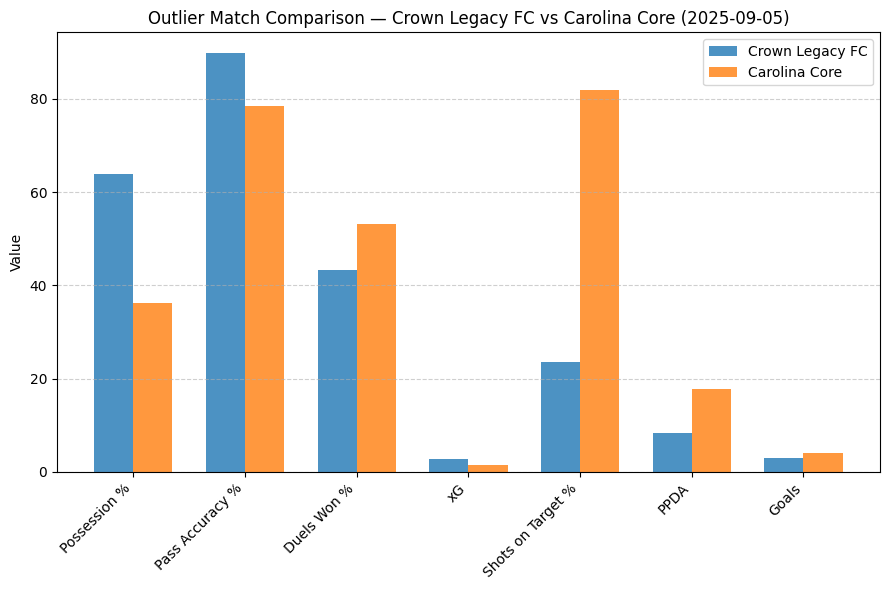

In [325]:
#CC

# =========================================
# Outlier Match Visualization
# Crown Legacy FC vs. Carolina Core (2025-09-05)
# =========================================

import matplotlib.pyplot as plt
import pandas as pd

# Key match stats for both teams
data = {
    'Metric': [
        'Possession %',
        'Pass Accuracy %',
        'Duels Won %',
        'xG',
        'Shots on Target %',
        'PPDA',
        'Goals'
    ],
    'Crown Legacy FC': [63.83, 89.81, 43.37, 2.77, 23.53, 8.28, 3],
    'Carolina Core':   [36.17, 78.47, 53.06, 1.37, 81.82, 17.67, 4]
}

df_match = pd.DataFrame(data)

# Plot setup
plt.figure(figsize=(9,6))
bar_width = 0.35
x = range(len(df_match))

plt.bar(x, df_match['Crown Legacy FC'], width=bar_width, label='Crown Legacy FC', alpha=0.8)
plt.bar([i + bar_width for i in x], df_match['Carolina Core'], width=bar_width, label='Carolina Core', alpha=0.8)

# Formatting
plt.xticks([i + bar_width/2 for i in x], df_match['Metric'], rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Outlier Match Comparison — Crown Legacy FC vs Carolina Core (2025-09-05)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [242]:
#CD

# | KPI                         | Why It’s Outcome-Based                                                                                                              |
# | --------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
# | Goals                       | The final result of offensive actions — the ultimate *outcome* of a possession.                                                     |
# | Penalties converted         | Shows how many penalty kicks resulted in goals — a *scoring result*, not a process.                                                 |
# | % Penalties converted       | A *success rate* — tells you the efficiency of scoring from penalties, not how many were taken.                                     |
# | Conceded goals              | Reflects *defensive outcomes* (how many goals allowed) rather than the defensive actions that led to preventing or allowing them.   |
# | Yellow cards                | Result of a *referee decision* after a foul — not part of the on-field tactical process.                                            |
# | Red cards                   | Same as above — an *outcome* of a disciplinary event, not a playing behavior.                                                       |
# | Corners with shots          | Describes how often a corner *resulted in* a shot — focuses on the *result* of the set piece, not how often the set piece happened. |
# | % Corners with shots        | The *conversion rate* of corners to shots — efficiency of an outcome.                                                               |
# | Counterattacks with shots   | Measures how many counterattacks *ended with a shot* — again, an *end product*.                                                     |
# | % Counterattacks with shots | Efficiency of counterattacks that *resulted in* a shot — outcome of attacking process.                                              |
# | PA with shots               | (Positional Attacks with shots) — shows how many positional attacks *led to a shot*. That’s an *outcome measure* of those attacks.  |
# | % PA with shots             | Conversion rate of positional attacks to shots — efficiency of attack outcomes.                                                     |
# | Set pieces with shots       | How many set pieces *produced* a shot — that’s a *result*, not a process.                                                           |
# | % Set pieces with shots     | The success rate of turning set pieces into shots — another *outcome efficiency metric*.                                            |


In [326]:
#CE

from sklearn.decomposition import PCA

# Fit PCA with 6 components
pca_6 = PCA(n_components=6, random_state=42)
X_pca_6 = pca_6.fit_transform(X_scaled)

# Explained variance
explained_var = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(6)],
    'Explained Variance (%)': pca_6.explained_variance_ratio_ * 100
})

print(explained_var)
print(f"\nTotal Variance Explained (PC1–PC6): {pca_6.explained_variance_ratio_[:6].sum() * 100:.2f}%")


  Principal Component  Explained Variance (%)
0                 PC1               24.126606
1                 PC2               11.734391
2                 PC3               10.800081
3                 PC4                9.037516
4                 PC5                6.947998
5                 PC6                6.146702

Total Variance Explained (PC1–PC6): 68.79%


In [327]:
#CF

print("PCA features:", pca_6.components_.T.shape[0])
print("df_process columns:", len(df_process.columns))



PCA features: 22
df_process columns: 41


In [328]:
#CG

print("df_process columns list:")
print(df_process.columns.tolist())


df_process columns list:
['Shots', 'Shots on Target', '% Shots on Target', 'xG', 'Possession, %', 'Passes', '% Accurate Passes', 'Crosses', '% Crosses accurate', 'Deep completed crosses', 'Deep completed passes', 'Runs', 'Runs leading to crosses', 'Touches in penalty area', 'Offensive duels', '% Offensive duels won', 'Forward passes', '% Accurate forward passes', 'Back passes', '% Accurate back passes', 'Lateral passes', '% Accurate lateral passes', 'Long passes', '% Accurate long passes', 'Passes to final third', '% Accurate passes to final third', 'Progressive passes', '% Accurate progressive passes', 'Smart passes', '% Accurate smart passes', 'Defensive duels', '% Defensive duels won', 'Aerial duels', '% Aerial duels won', 'Sliding tackles', '% Successful sliding tackles', 'Interceptions', 'Clearances', 'Fouls', 'PPDA', 'Cluster']


In [329]:
#CH

df_process = df_process.select_dtypes(include='number')


In [330]:
#CI

X_scaled = scaler.fit_transform(df_process)

from sklearn.decomposition import PCA
pca_6 = PCA(n_components=6)
pca_6.fit(X_scaled)


,n_components,6
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [331]:
#CJ

loadings_6 = pd.DataFrame(
    pca_6.components_.T,
    columns=[f'PC{i+1}' for i in range(6)],
    index=df_process.columns
)
loadings_6.round(3)


,PC1,PC2,PC3,PC4,PC5,PC6
Shots,0.202,0.268,-0.070,-0.108,-0.013,0.073
Shots on Target,0.155,0.236,-0.154,-0.172,-0.029,0.277
% Shots on Target,0.007,0.058,-0.134,-0.142,-0.056,0.317
xG,0.149,0.236,-0.142,-0.151,-0.024,0.147
"Possession, %",0.227,-0.166,0.207,0.067,0.050,0.075
Passes,0.238,-0.223,0.120,0.122,-0.025,0.140
% Accurate Passes,0.192,-0.264,-0.226,0.103,0.125,0.014
Crosses,0.230,0.164,0.061,-0.000,-0.056,-0.238
% Crosses accurate,0.062,0.050,-0.219,0.175,-0.256,-0.164
Deep completed crosses,0.207,0.208,-0.068,0.148,-0.189,-0.216


In [332]:
#CK

print(loadings.columns)


Index(['PC1', 'PC2'], dtype='object')


In [333]:
#CL

print(X_scaled.shape)
print(df.columns.shape)
print(df_process.columns.shape)


(151, 41)
(110,)
(41,)


In [334]:
#CM

import pandas as pd
from sklearn.decomposition import PCA

# Fit PCA (assuming you already scaled your data)
pca_6 = PCA(n_components=6)
pca_6.fit(X_scaled)

# Create the loadings DataFrame
loadings_6 = pd.DataFrame(
    pca_6.components_.T,
    columns=[f'PC{i+1}' for i in range(6)],
    index=df_process.columns  
)

loadings_6.round(3)


,PC1,PC2,PC3,PC4,PC5,PC6
Shots,0.202,0.268,-0.070,-0.108,-0.013,0.073
Shots on Target,0.155,0.236,-0.154,-0.172,-0.029,0.277
% Shots on Target,0.007,0.058,-0.134,-0.142,-0.056,0.317
xG,0.149,0.236,-0.142,-0.151,-0.024,0.147
"Possession, %",0.227,-0.166,0.207,0.067,0.050,0.075
Passes,0.238,-0.223,0.120,0.122,-0.025,0.140
% Accurate Passes,0.192,-0.264,-0.226,0.103,0.125,0.014
Crosses,0.230,0.164,0.061,-0.000,-0.056,-0.238
% Crosses accurate,0.062,0.050,-0.219,0.175,-0.256,-0.164
Deep completed crosses,0.207,0.208,-0.068,0.148,-0.189,-0.216


C:\Users\jelli\AppData\Local\Temp\ipykernel_46572\769775516.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index, palette='viridis')
C:\Users\jelli\AppData\Local\Temp\ipykernel_46572\769775516.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index, palette='viridis')
C:\Users\jelli\AppData\Local\Temp\ipykernel_46572\769775516.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index, palette='viridis'

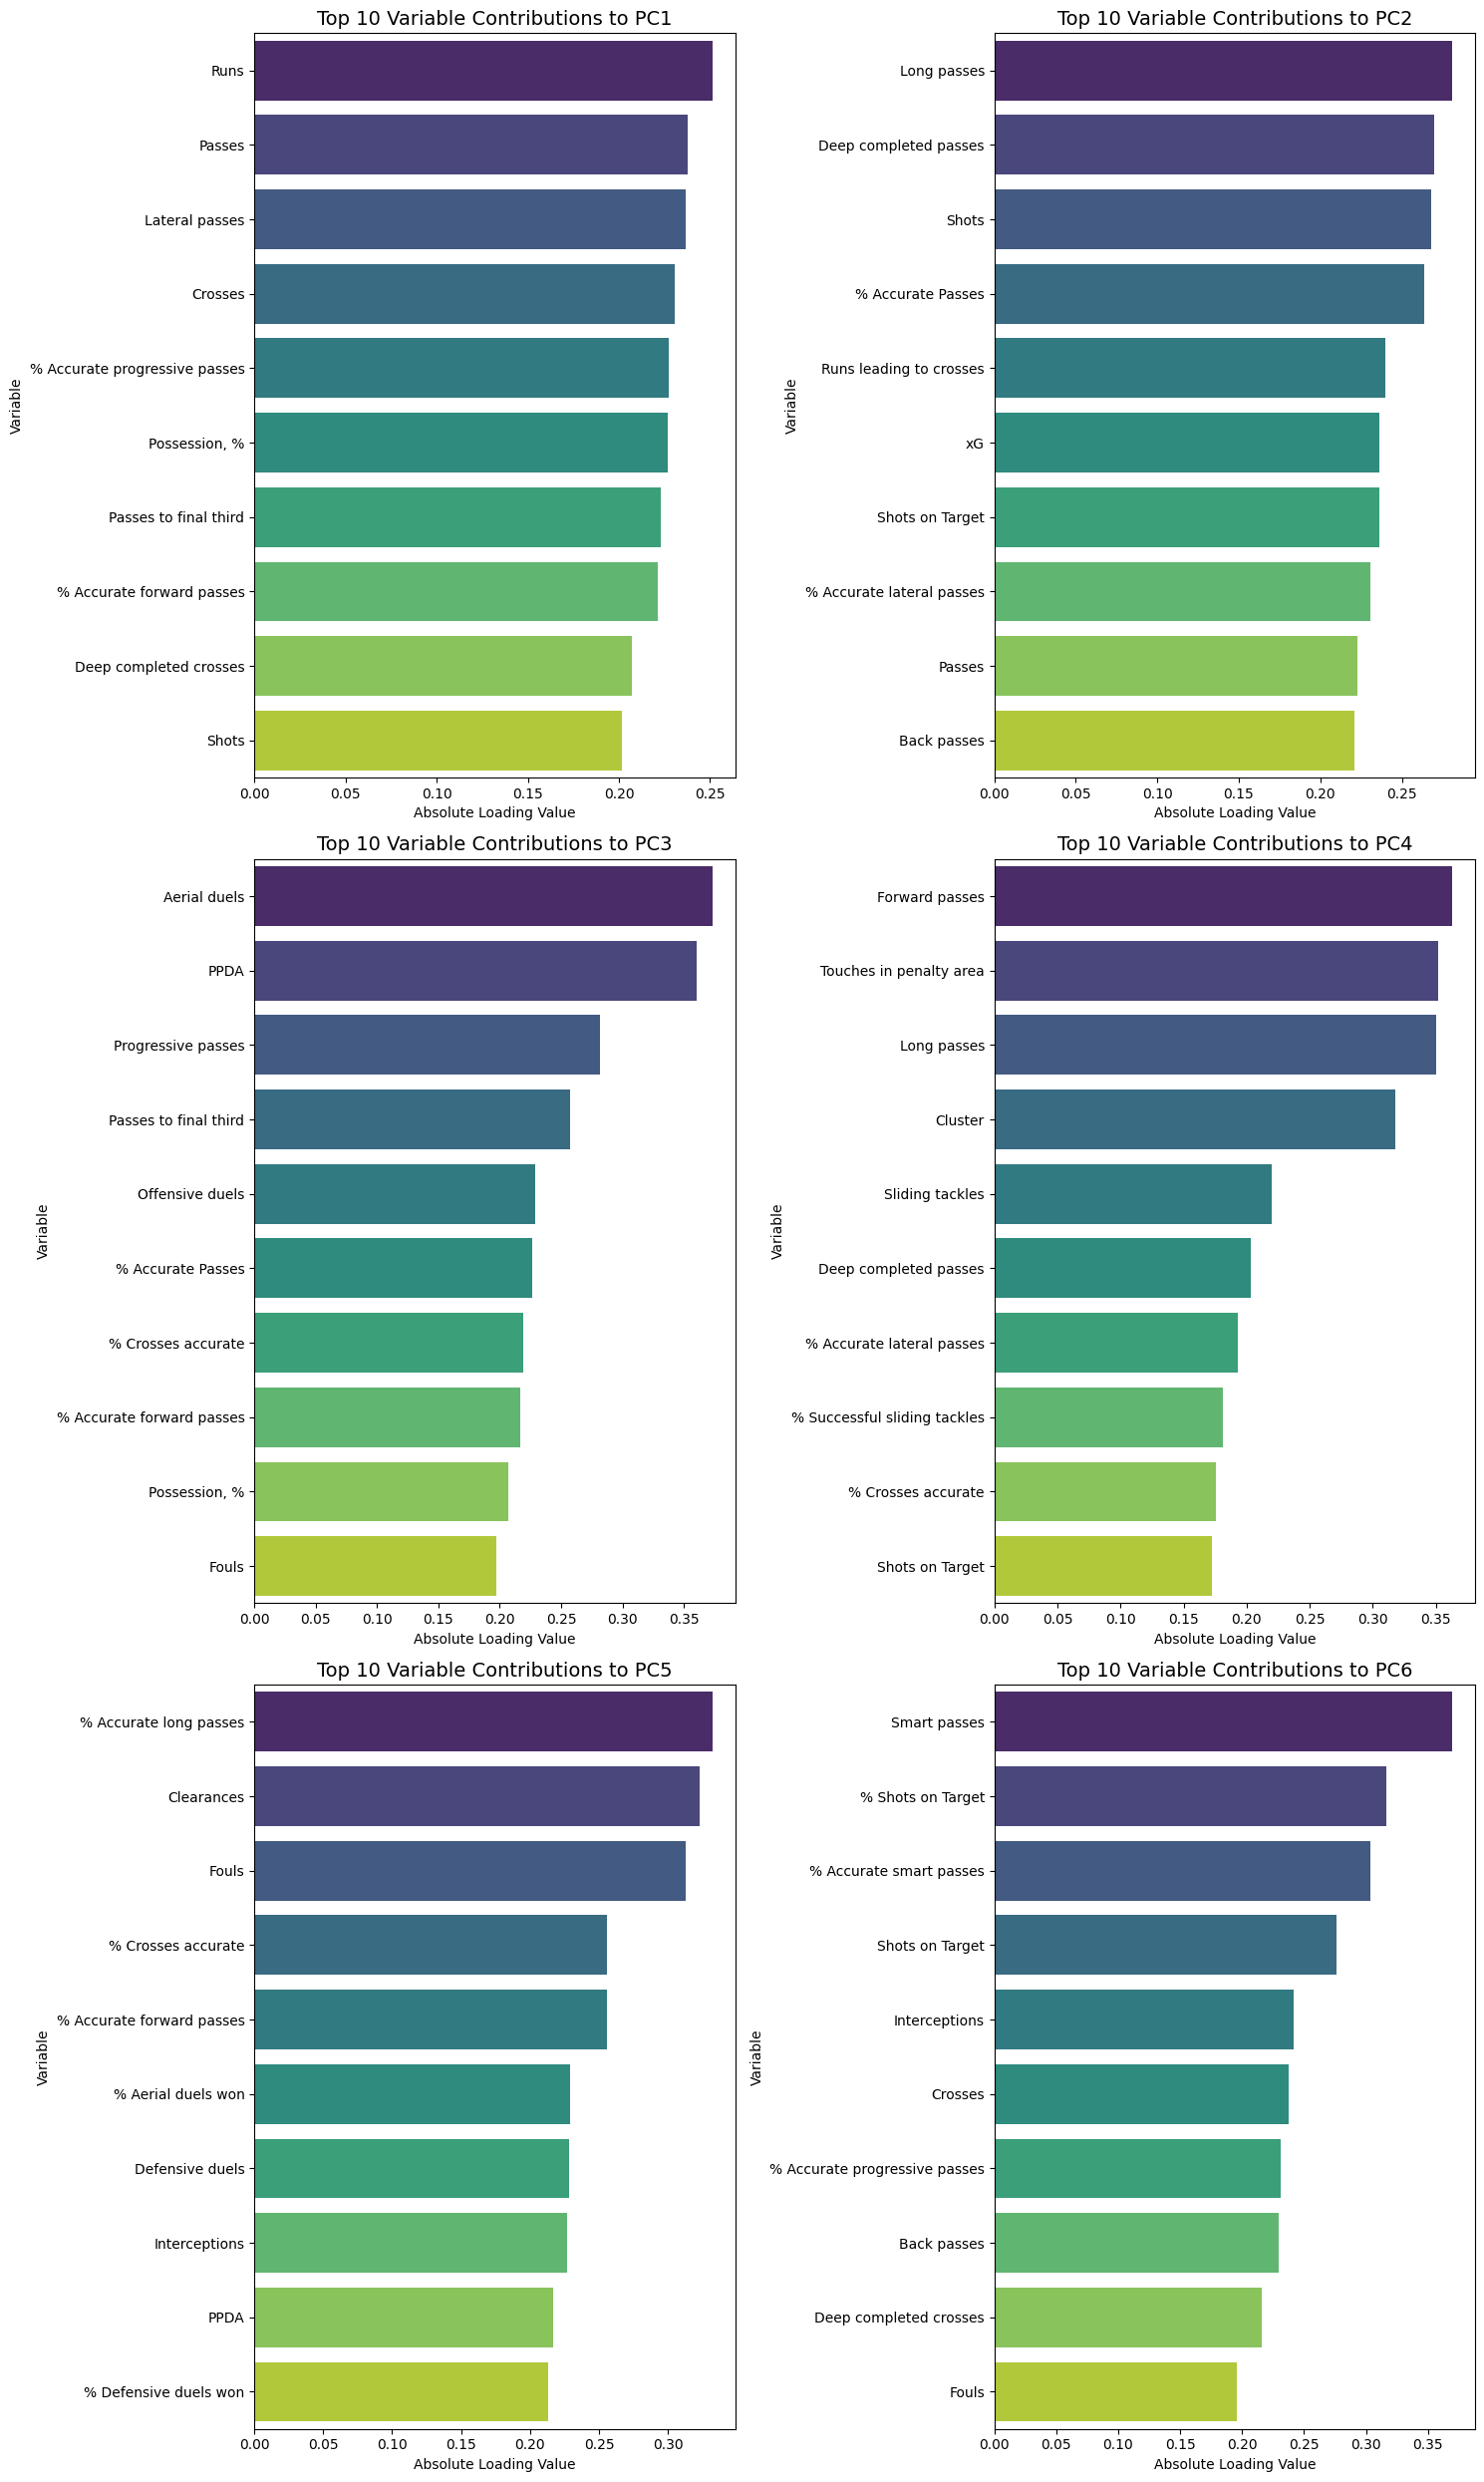

In [335]:
#CN

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize top 10 contributors for each component
num_pcs = 6
plt.figure(figsize=(15, 25))

for i in range(num_pcs):
    pc = f'PC{i+1}'
    sorted_loadings = loadings_6[pc].abs().sort_values(ascending=False).head(10)
    plt.subplot(3, 2, i+1)
    sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index, palette='viridis')
    plt.title(f'Top 10 Variable Contributions to {pc}', fontsize=14)
    plt.xlabel('Absolute Loading Value')
    plt.ylabel('Variable')

plt.tight_layout()
plt.show()


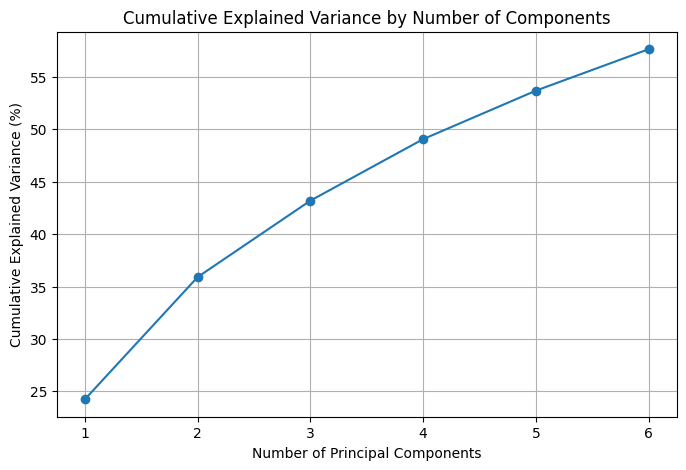

In [ ]:
#CO

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca_6.explained_variance_ratio_) + 1),
         np.cumsum(pca_6.explained_variance_ratio_) * 100,
         marker='o')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()


CP

Interpretation of PCA Cumulative Explained Variance Plot

1. Purpose of the Plot

This plot is a standard output from Principal Component Analysis (PCA). Its primary function is to serve as a diagnostic tool for dimensionality reduction. It helps select the optimal number of principal components (PCs) that can represent the original dataset while retaining an acceptable amount of the total variance (information).

The x-axis represents the Number of Principal Components used. The y-axis represents the Cumulative Explained Variance (%), which is the total percentage of variability captured by the selected number of components.


2. Key Data Points and Implications

The plotted points reveal how much information is lost or retained as the dimensionality is reduced:

What the data shows:

1 Component: Explains about 24.5% of the total variance.

2 Components: Explains about 36% of the total variance.

3 Components: Explains about 43% of the total variance.

4 Components: Explains about 49% of the total variance.

5 Components: Explains about 54% of the total variance.

6 Components: Explains nearly 57% of the total variance.


3. Determining the Optimal Number (The "Elbow" Method)

The elbow method indicates to look for the point where the curve starts to bend and flatten out. This point represents where the marginal gain (the amount of new variance explained by adding one more component) begins to diminish significantly.

The steepest gains occur between PC 1, 2, and 3.

The curve starts to significantly flatten out (the "elbow" region) between 4 and 6 components.


4. Conclusion and Strategic Decision

Low Effectiveness: The fact that 6 components only explain approximately 57% of the total variance is significant. Ideally the aim is to capture 80% to 90% of the variance. This plot suggests that:
The original data's total variance is quite evenly distributed across many features, or a massive dimensionality reduction (e.g., down to 2 or 3 PCs) could lead to a substantial loss of information (approximately 60%-75%). 

In [ ]:
#CQ

print(df.columns.tolist())


['Date', 'Match', 'Competition', 'Duration', 'Team', 'Scheme', 'Goals', 'xG', 'Shots', 'Shots on Target', '% Shots on Target', 'Passes', 'Accurate Passes', '% Accurate Passes', 'Possession, %', 'Losses', 'Low Losses', 'Medium Losses', 'High Losses', 'Recoveries', 'Low Recoveries', 'Medium Recoveries', 'High Recoveries', 'Duels', 'Duels Won', 'Duels Won%', 'Shots from outside penalty area', ' SOP on target', '% SOP on target', 'Positional attacks', 'PA with shots', '% PA with shots', 'Counterattacks', 'Counterattacks with shots', '% Counterattacks with shots', 'Set pieces', 'Set pieces with shots', '% Set pieces with shots', 'Corners', 'Corners with shots', '% Corners with shots', 'Free kicks', 'Free kicks with shots', '% Free kicks with shots', 'Penalties', 'Penalties converted', '% Penalties converted', 'Crosses', 'Crosses accurate', '% Crosses accurate', 'Deep completed crosses', 'Deep completed passes', 'Runs', 'Runs leading to crosses', '% RLtC', 'Touches in penalty area', 'Offensi

In [ ]:
#CR

def get_result(row):
    if row['Goals'] > row['Conceded goals']:
        return 'Win'
    elif row['Goals'] < row['Conceded goals']:
        return 'Loss'
    else:
        return 'Draw'

df['Result'] = df.apply(get_result, axis=1)

In [ ]:
#CS

df[['Goals', 'Conceded goals', 'Result']]

In [ ]:
#CT

# Save to a new Excel file
df.to_excel('Crown_Legacy_Stats_Full_Updated.xlsx', index=False)

In [ ]:
#CU

from sklearn.decomposition import PCA

# Create PCA model with 20 components
pca_20 = PCA(n_components=20, random_state=42)

# Fit PCA on your scaled data
X_pca_20 = pca_20.fit_transform(X_scaled)

# Convert results into a dataframe
pca_20_df = pd.DataFrame(
    X_pca_20,
    columns=[f'PC{i+1}' for i in range(20)]
)

# Combine with your existing cluster labels if you want later
print("Shape of PCA-transformed data:", pca_20_df.shape)


Shape of PCA-transformed data: (162, 20)


In [ ]:
#CV

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"PC{i}: {ev:.4f} ({cv:.4f} cumulative)")


PC1: 0.2400 (0.2400 cumulative)
PC2: 0.1160 (0.3560 cumulative)


In [ ]:
#CW

print(len(pca.explained_variance_ratio_))


2


In [ ]:
#CX

%whos


Variable                        Type                Data/Info
-------------------------------------------------------------
Axes3D                          type                <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
Crown_Legacy_Stats_FULL         DataFrame                           Date     <...>n[164 rows x 109 columns]
KMeans                          ABCMeta             <class 'sklearn.cluster._kmeans.KMeans'>
K_range                         range               range(2, 11)
Kmeans                          type                <class '__main__.Kmeans'>
PCA                             ABCMeta             <class 'sklearn.decomposition._pca.PCA'>
StandardScaler                  type                <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                               DataFrame                Conceded goals  Shot<...>\n[162 rows x 22 columns]
X_df                            DataFrame               Conceded goals  Shots<...>n\n[81 rows x 23 columns]
X_pca             

In [ ]:
#CY

from sklearn.decomposition import PCA

# Run PCA on your standardized data
pca = PCA(n_components=20, random_state=42)
pca_data = pca.fit_transform(X_scaled)

# Check shape to confirm success
print(pca_data.shape)


(162, 20)


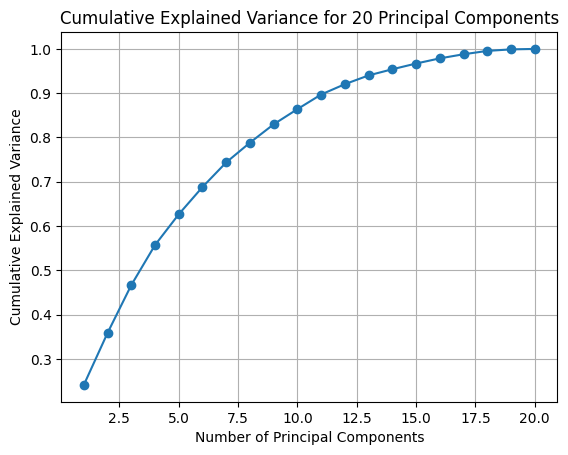

In [ ]:
#CZ

import numpy as np
import matplotlib.pyplot as plt

# Calculate explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance
plt.plot(range(1, 21), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for 20 Principal Components')
plt.grid(True)
plt.show()


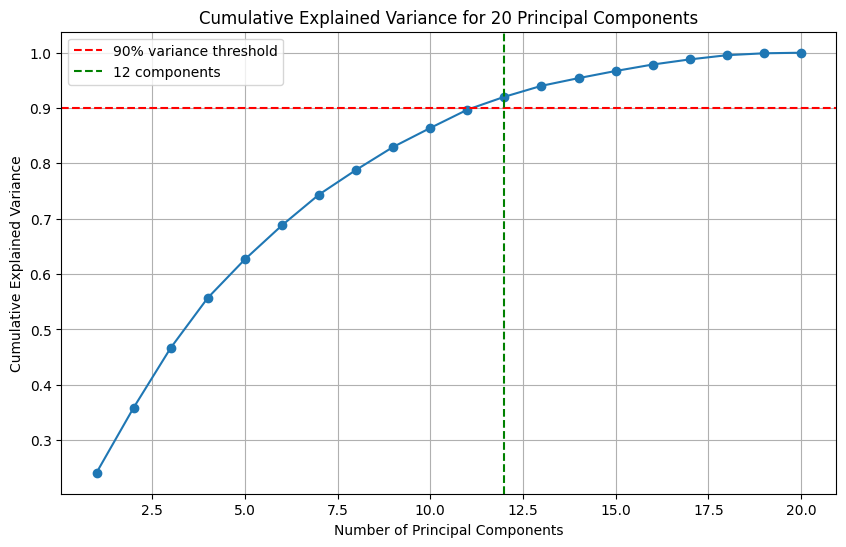

Number of components needed to reach 90% explained variance: 12


In [ ]:
#DA

import numpy as np
import matplotlib.pyplot as plt

# Calculate explained variance ratio and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find the number of components needed to reach 90% variance
threshold = 0.90
num_components_90 = np.argmax(cumulative_variance >= threshold) + 1

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=threshold, color='r', linestyle='--', label='90% variance threshold')
plt.axvline(x=num_components_90, color='g', linestyle='--', label=f'{num_components_90} components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for 20 Principal Components')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of components needed to reach 90% explained variance: {num_components_90}")


In [ ]:
#DB

# Create a table of explained variance for the first 20 PCs
explained_var = pd.DataFrame({
    'Principal Component': range(1, 21),
    'Explained Variance (%)': np.round(pca.explained_variance_ratio_[:20] * 100, 2),
    'Cumulative Variance (%)': np.round(np.cumsum(pca.explained_variance_ratio_[:20]) * 100, 2)
})

explained_var


,Principal Component,Explained Variance (%),Cumulative Variance (%)
0,1,24.13,24.13
1,2,11.73,35.86
2,3,10.80,46.66
3,4,9.04,55.70
4,5,6.95,62.65
5,6,6.15,68.79
6,7,5.56,74.36
7,8,4.45,78.81
8,9,4.15,82.96
9,10,3.42,86.38


In [ ]:
#DC

# PCA Interpretation Notes
# -------------------------
# - PC1 explains the largest portion of variance (~24%), capturing the main pattern in the data.
# - PC2 adds another ~11.7%, bringing the total explained variance to about 36%.
# - PC3–PC6 each add around 6–10%, raising the cumulative variance to nearly 69%.
# - By PC10, around 86% of the total variance is explained.
# - By PC12, about 92% of the total variance is captured.
# - After PC12, each additional component contributes less than 2%—these mostly capture minor noise or subtle patterns.

# Key takeaway:
# The first 10–12 principal components capture over 90% of the total variance.
# This means most of the important information from the 22 defensive KPIs
# is effectively represented within these first 10–12 components.


In [ ]:
#DD

feature_names = [f'Feature_{i+1}' for i in range(X_scaled.shape[1])]



In [ ]:
#DE

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Feature_1,-0.040785,0.042849,-0.239278,0.040202,0.478176,-0.249374,0.414919,-0.044478,-0.059601,0.054755,-0.112834,0.438056,0.380676,0.066147,-0.041772,-0.224831,0.009002,-0.239635,0.047332,0.007393
Feature_2,-0.062644,0.394876,-0.321379,0.245600,0.081269,0.040233,-0.042860,-0.023544,0.128090,0.114020,-0.003610,-0.322571,-0.315040,0.103495,0.107776,0.047472,0.063393,-0.632781,-0.011322,0.061099
Feature_3,-0.093123,0.305908,-0.357641,0.212273,0.257237,-0.094407,0.197030,-0.116070,0.102549,0.141796,0.093514,-0.153010,-0.147235,-0.078891,-0.100111,0.233296,-0.007299,0.664647,0.010990,-0.008023
Feature_4,0.184883,0.351230,-0.135025,0.028149,-0.261077,0.091086,-0.029048,0.049930,-0.062525,-0.113584,0.511552,0.140575,0.099564,0.447502,0.146078,-0.407513,-0.151099,0.145555,0.060182,-0.012453
Feature_5,0.157345,0.288708,-0.208081,0.074145,-0.118166,0.259896,-0.319067,0.097423,-0.155355,0.029113,-0.108590,0.600456,-0.167967,-0.365569,-0.263335,0.052329,0.118581,-0.017531,-0.066407,0.002500


In [ ]:
#DF

# List all currently defined variables in memory
%whos


Variable                        Type                Data/Info
-------------------------------------------------------------
Axes3D                          type                <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
Crown_Legacy_Stats_FULL         DataFrame                           Date     <...>n[164 rows x 109 columns]
KMeans                          ABCMeta             <class 'sklearn.cluster._kmeans.KMeans'>
K_range                         range               range(2, 11)
Kmeans                          type                <class '__main__.Kmeans'>
PCA                             ABCMeta             <class 'sklearn.decomposition._pca.PCA'>
StandardScaler                  type                <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                               DataFrame                Conceded goals  Shot<...>\n[162 rows x 22 columns]
X_df                            DataFrame               Conceded goals  Shots<...>n\n[81 rows x 23 columns]
X_pca             

In [ ]:
#DG

# Use the original DataFrame of features (the one you scaled before)
# According to your workspace, that DataFrame is named `X` and has the 22 KPI column names.
feature_names = list(X.columns)   # <-- actual KPI names

# Sanity check: number of features must match number of columns used in PCA
print("n features (feature_names):", len(feature_names))
print("X_scaled shape:", X_scaled.shape)
print("pca n_components:", pca.n_components_)
print("pca.components_ shape:", pca.components_.shape)

# Build loadings DataFrame with real KPI names as the index
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

# Show top 10 contributing KPIs (absolute loadings) for each PC, with sign and rounded value
for i in range(1, pca.n_components_ + 1):
    pc = f'PC{i}'
    top = loadings[pc].abs().sort_values(ascending=False).head(10)
    print(f"\n🔹 Top 10 features contributing to {pc}:")
    # print with original sign (so you see + vs -) and rounded values
    for feat in top.index:
        val = loadings.loc[feat, pc]
        print(f"   {feat}: {val:.4f}")

In [ ]:
#DH

print(df.columns[:10])


Index(['Date', 'Match', 'Competition', 'Duration', 'Team', 'Scheme', 'Goals',
       'xG', 'Shots', 'Shots on Target'],
      dtype='object')


C:\Users\jelli\AppData\Local\Temp\ipykernel_46572\2327545900.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.loc[top_features, pc], y=top_features, ax=axes[i], palette='coolwarm')
C:\Users\jelli\AppData\Local\Temp\ipykernel_46572\2327545900.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.loc[top_features, pc], y=top_features, ax=axes[i], palette='coolwarm')
C:\Users\jelli\AppData\Local\Temp\ipykernel_46572\2327545900.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.loc[top_features, pc]

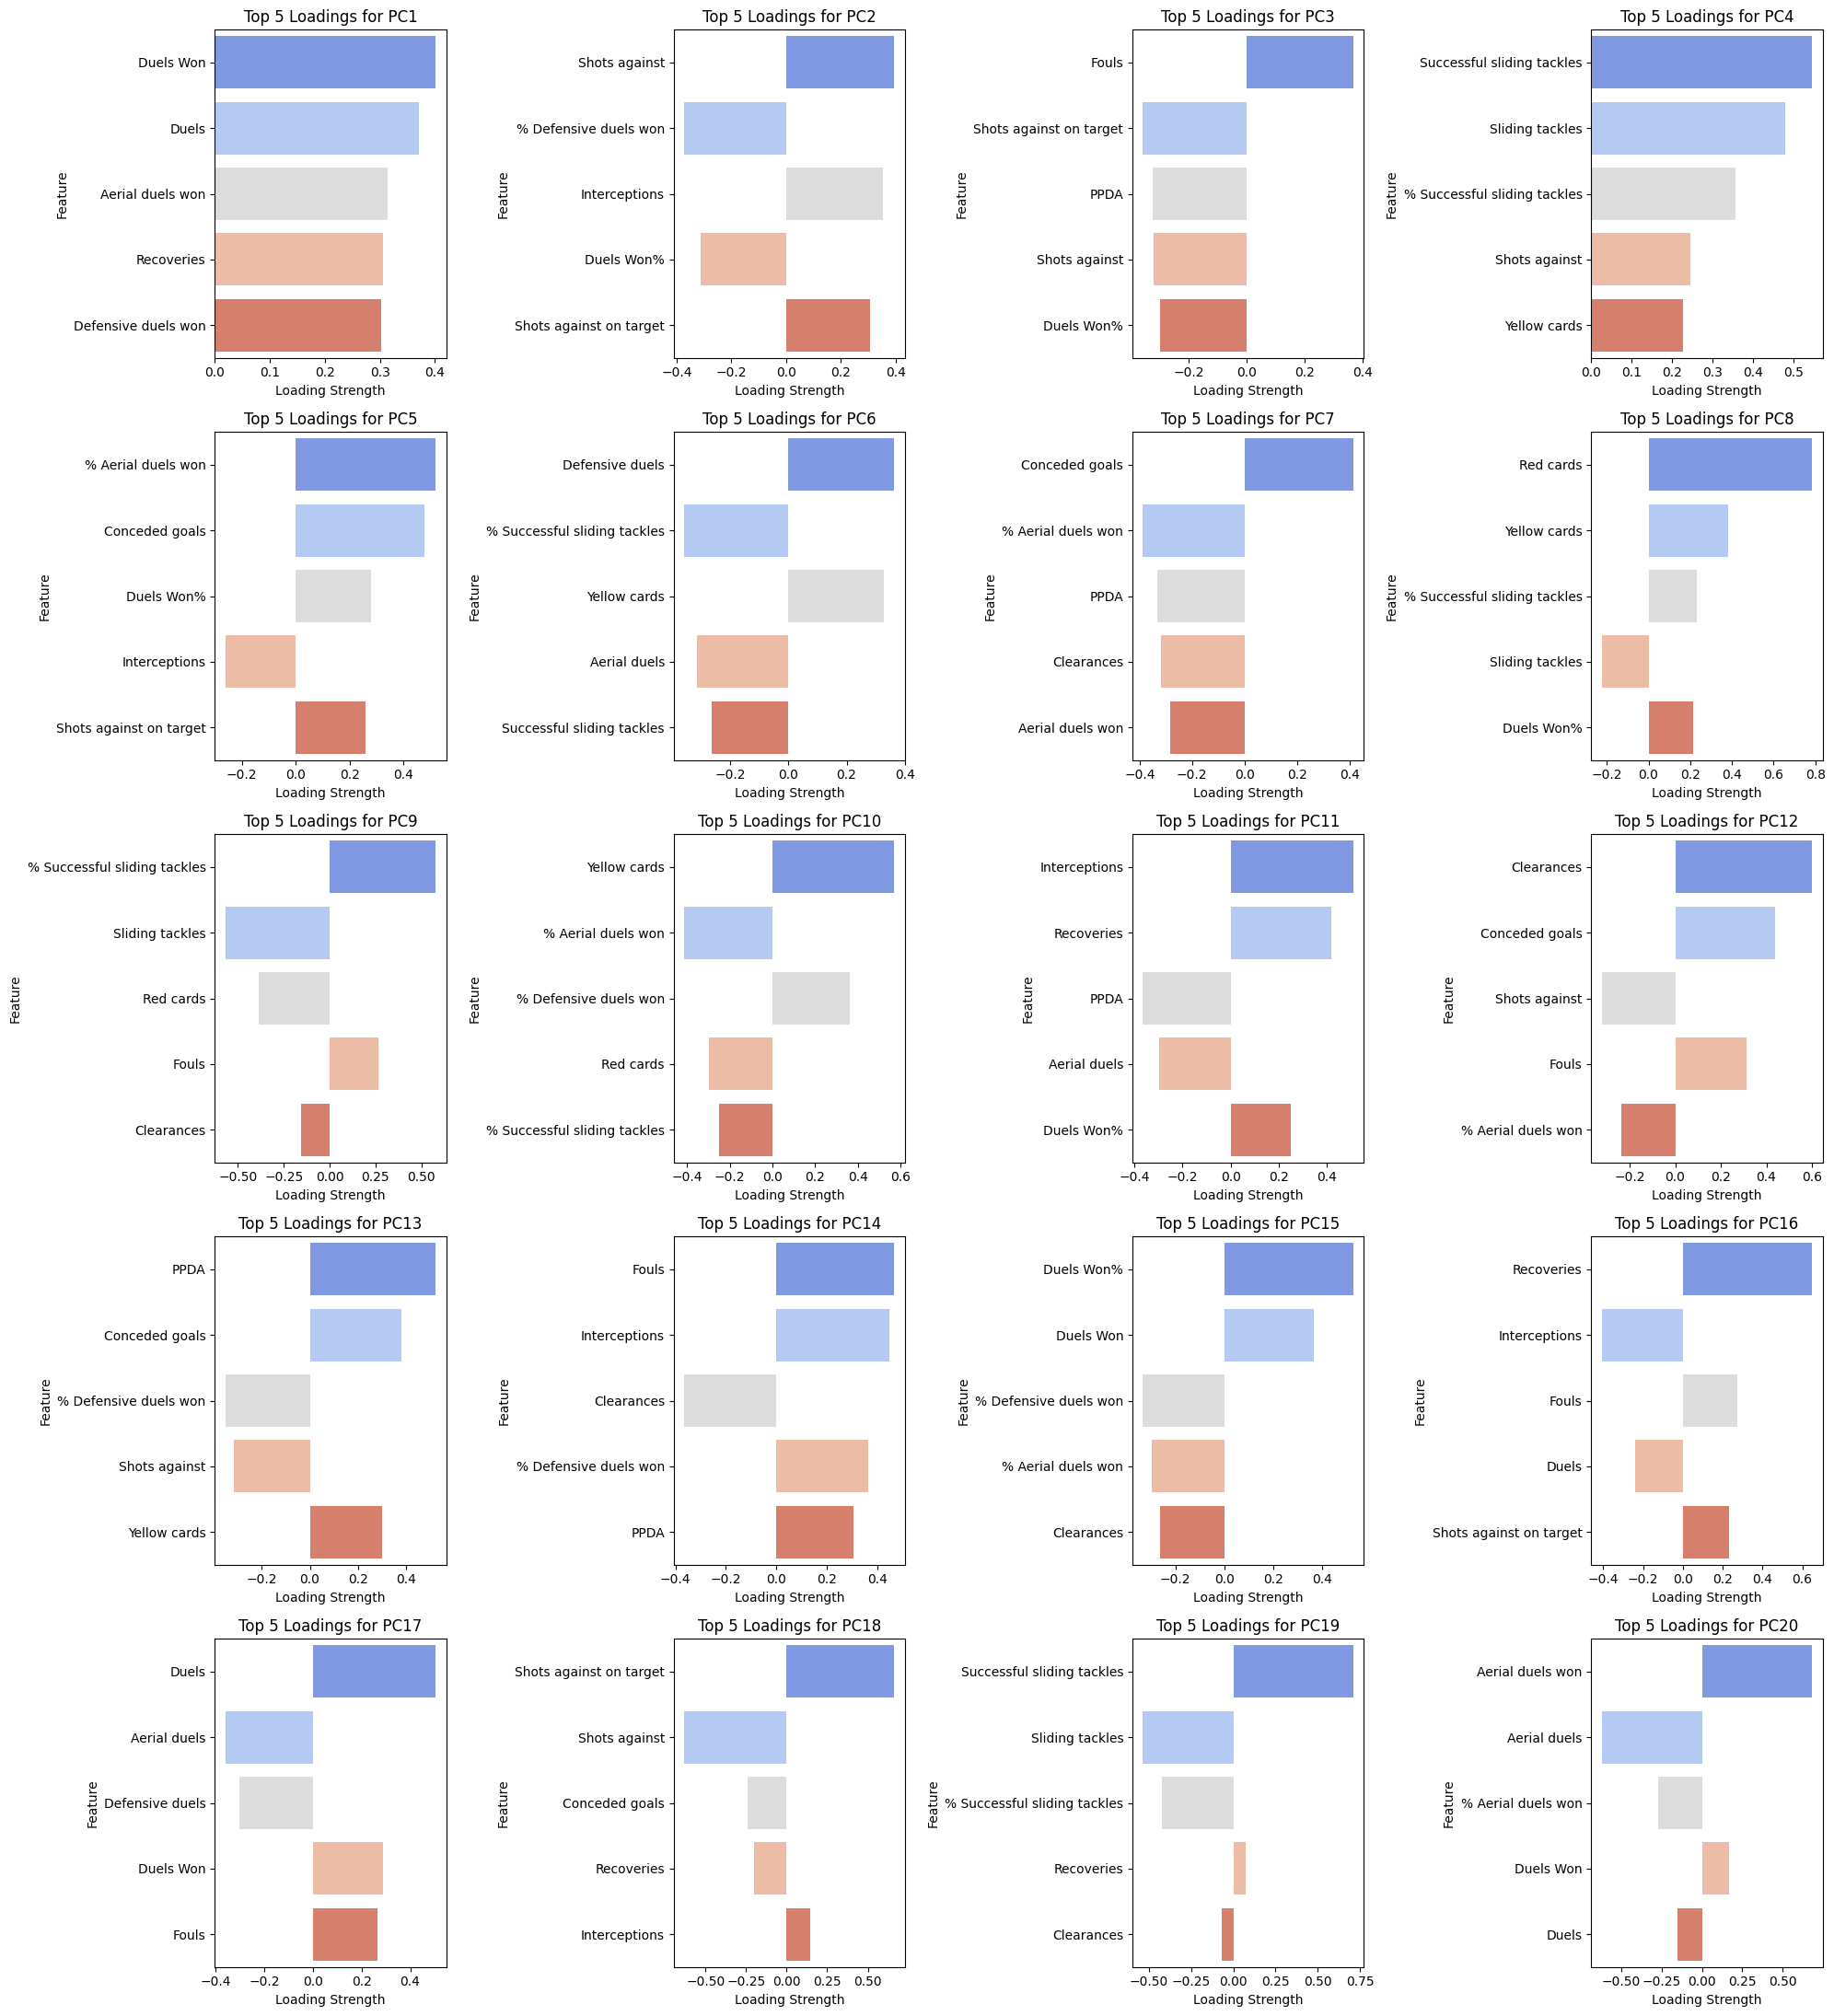

In [ ]:
#DI

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assign correct feature names
original_feature_names = df_kpis.columns

# Create DataFrame for PCA loadings
loadings_df = pd.DataFrame(
    pca.components_.T,
    index=original_feature_names,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Set up figure (5 rows x 4 columns = 20 PCs)
fig, axes = plt.subplots(5, 4, figsize=(20, 22))
axes = axes.flatten()

# Plot top 5 contributing features for each PC
for i in range(20):
    pc = f'PC{i+1}'
    top_features = loadings_df[pc].abs().sort_values(ascending=False).head(5).index
    sns.barplot(x=loadings_df.loc[top_features, pc], y=top_features, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Top 5 Loadings for {pc}')
    axes[i].set_xlabel('Loading Strength')
    axes[i].set_ylabel('Feature')

plt.tight_layout()
plt.show()


In [ ]:
#DJ

# Logistic Regression Model Setup
# -------------------------------
# Goal:
# Build a logistic regression model to predict whether a team secures a *positive result* 
# (Win or Draw) versus a *negative result* (Loss).
#
# Rationale:
# - In soccer, teams earn points from match outcomes:
#     • Win  = 3 points
#     • Draw = 1 point
#     • Loss = 0 points
# - Both Wins and Draws contribute points to the standings, while Losses do not.
# - Therefore, we create a binary target variable where:
#     • 1 = Win or Draw  (team gains points)
#     • 0 = Loss         (team gains no points)
#
# Objective:
# The model will help identify which team performance metrics (features)
# have the most influence on achieving a positive result (win/draw).
#
# Next Steps:
# 1. Create the binary target variable ('Result_Binary').
# 2. Split the dataset into training and test sets.
# 3. Train a Logistic Regression model.
# 4. Evaluate its accuracy and identify the most impactful features.


In [ ]:
#DK

# ------------------------------------------
# Handling Missing Values
# ------------------------------------------
# Logistic Regression cannot handle NaN values directly,
# so I used SimpleImputer to replace missing values.
# The imputer fills missing values with the mean of each feature column.
# This ensures the model can train without dropping valuable data.


In [5]:
#DL
# ---------------------------------------------------
# STEP 0: Re-upload the updated dataset
# ---------------------------------------------------

import pandas as pd

# Load the updated dataset
file_path = "Crown_Legacy_Stats_Full_Updated.xlsx"  # or .csv if applicable
df = pd.read_excel(file_path)  # change to read_csv(file_path) if it's a CSV

# Confirm the dataset loaded correctly
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("First 5 rows:")
display(df.head())

# Check all column names to confirm 'Result' exists
print("\nColumn Names:")
print(df.columns.tolist())


✅ Dataset loaded successfully!
Shape: (162, 110)
First 5 rows:


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,Accurate throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA,Result
0,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100,Crown Legacy FC,4-4-2 (100.0%),3,2.77,17,4,...,17,89.47,4,15.00,4.40,8.28,19.22,21.08,8.58,Loss
1,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100,Carolina Core,5-4-1 (100.0%),4,1.37,11,9,...,13,100.00,5,15.40,2.91,19.34,19.15,22.95,17.67,Win
2,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102,Crown Legacy FC,4-4-2 (100.0%),0,3.62,23,5,...,25,96.15,2,15.72,3.38,9.12,14.93,19.57,8.14,Loss
3,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102,Orlando City B,4-4-2 (100.0%),1,0.57,10,3,...,22,88.00,12,15.85,3.95,8.09,20.28,19.37,8.72,Win
4,2025-08-23,Crown Legacy FC - Inter Miami II 6:0,United States. MLS Next Pro,93,Crown Legacy FC,4-4-2 (100.0%),6,4.85,21,13,...,24,85.71,5,15.62,4.05,8.24,15.65,18.99,11.21,Win



Column Names:
['Date', 'Match', 'Competition', 'Duration', 'Team', 'Scheme', 'Goals', 'xG', 'Shots', 'Shots on Target', '% Shots on Target', 'Passes', 'Accurate Passes', '% Accurate Passes', 'Possession, %', 'Losses', 'Low Losses', 'Medium Losses', 'High Losses', 'Recoveries', 'Low Recoveries', 'Medium Recoveries', 'High Recoveries', 'Duels', 'Duels Won', 'Duels Won%', 'Shots from outside penalty area', ' SOP on target', '% SOP on target', 'Positional attacks', 'PA with shots', '% PA with shots', 'Counterattacks', 'Counterattacks with shots', '% Counterattacks with shots', 'Set pieces', 'Set pieces with shots', '% Set pieces with shots', 'Corners', 'Corners with shots', '% Corners with shots', 'Free kicks', 'Free kicks with shots', '% Free kicks with shots', 'Penalties', 'Penalties converted', '% Penalties converted', 'Crosses', 'Crosses accurate', '% Crosses accurate', 'Deep completed crosses', 'Deep completed passes', 'Runs', 'Runs leading to crosses', '% RLtC', 'Touches in penalty 

In [2]:
print(df.columns.tolist())

['Date', 'Match', 'Competition', 'Duration', 'Team', 'Scheme', 'Goals', 'xG', 'Shots', 'Shots on Target', '% Shots on Target', 'Passes', 'Accurate Passes', '% Accurate Passes', 'Possession, %', 'Losses', 'Low Losses', 'Medium Losses', 'High Losses', 'Recoveries', 'Low Recoveries', 'Medium Recoveries', 'High Recoveries', 'Duels', 'Duels Won', 'Duels Won%', 'Shots from outside penalty area', ' SOP on target', '% SOP on target', 'Positional attacks', 'PA with shots', '% PA with shots', 'Counterattacks', 'Counterattacks with shots', '% Counterattacks with shots', 'Set pieces', 'Set pieces with shots', '% Set pieces with shots', 'Corners', 'Corners with shots', '% Corners with shots', 'Free kicks', 'Free kicks with shots', '% Free kicks with shots', 'Penalties', 'Penalties converted', '% Penalties converted', 'Crosses', 'Crosses accurate', '% Crosses accurate', 'Deep completed crosses', 'Deep completed passes', 'Runs', 'Runs leading to crosses', '% RLtC', 'Touches in penalty area', 'Offensi

In [6]:
#DL
# ---------------------------------------------------
# STEP 1: Drop non-KPI or outcome-based columns
# ---------------------------------------------------

# These columns are metadata or outcome-based (e.g., goals, results) and not process-oriented KPIs.

outcome_based = [
    'Goals', 'xG', 'Conceded goals', 'Shots', 'Shots on Target', '% Shots on Target',
    'Shots from outside penalty area', ' SOP on target', '% SOP on target',
    'PA with shots', '% PA with shots',
    'Counterattacks with shots', '% Counterattacks with shots',
    'Set pieces with shots', '% Set pieces with shots',
    'Corners with shots', '% Corners with shots',
    'Free kicks with shots', '% Free kicks with shots',
    'Penalties converted', '% Penalties converted',
    'Offsides', 'Shots against', 'Shots against on target', '% Shots against on target'
]

non_kpi_columns = [
    'Date', 'Match', 'Competition', 'Duration', 'Team', 'Scheme'
]

# Drop both sets of columns (only those that exist)
cols_to_drop = [col for col in (outcome_based + non_kpi_columns) if col in df.columns]
df_cleaned = df.drop(columns=cols_to_drop)

# Show shape and preview
print(f"Remaining columns: {len(df_cleaned.columns)}")
df_cleaned.head()


Remaining columns: 79


,Passes,Accurate Passes,% Accurate Passes,"Possession, %",Losses,Low Losses,Medium Losses,High Losses,Recoveries,Low Recoveries,...,Accurate throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA,Result
0,471,423,89.81,63.83,69,9,15,45,63,26,...,17,89.47,4,15.00,4.40,8.28,19.22,21.08,8.58,Loss
1,274,215,78.47,36.17,80,15,28,37,64,45,...,13,100.00,5,15.40,2.91,19.34,19.15,22.95,17.67,Win
2,351,293,83.48,42.95,85,11,30,44,64,21,...,25,96.15,2,15.72,3.38,9.12,14.93,19.57,8.14,Loss
3,470,406,86.38,57.05,102,30,37,35,67,40,...,22,88.00,12,15.85,3.95,8.09,20.28,19.37,8.72,Win
4,425,363,85.41,50.84,107,16,41,50,78,32,...,24,85.71,5,15.62,4.05,8.24,15.65,18.99,11.21,Win


In [ ]:
# ---------------------------------------------------
# STEP 2: Verify and clean remaining process-oriented KPIs
# ---------------------------------------------------

# Preview all remaining columns to confirm what remains after dropping outcome-based KPIs
print("Columns remaining after cleaning:\n")
print(df_cleaned.columns.tolist())

# Identify any columns with '%' symbols (percentage-based features)
# We'll convert them to numeric (divide by 100 for proper scaling later)
percent_cols = [col for col in df_cleaned.columns if '%' in col]
print(f"\nPercentage columns detected: {percent_cols}")

# Convert all percentage columns from string/object to numeric values (e.g., 55% → 0.55)
for col in percent_cols:
    df_cleaned[col] = (
        df_cleaned[col]
        .astype(str)          # ensure string type for replace
        .str.replace('%', '', regex=False)  # remove '%' sign
        .astype(float) / 100   # convert to decimal
    )

# Note: 'Result' will temporarily become NaN here since it's non-numeric.
# I'll handle it later when creating the binary target variable.

# Convert all remaining columns to numeric where possible
# This ensures later ML models don’t fail on unexpected strings
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Check for any missing values after cleaning
missing_values = df_cleaned.isnull().sum().sum()
print(f"\nTotal missing values after cleanup: {missing_values}")

# Handle missing values if they exist — fill with column mean
if missing_values > 0:
    df_cleaned = df_cleaned.fillna(df_cleaned.mean())
    print("Missing values were replaced with column means.")

# Confirm data types and final shape
print("\nData types after cleaning:")
print(df_cleaned.dtypes)
print(f"\nFinal dataset shape: {df_cleaned.shape}")

# Display a small preview of the cleaned DataFrame
df_cleaned.head()

Columns remaining after cleaning:

['Passes', 'Accurate Passes', '% Accurate Passes', 'Possession, %', 'Losses', 'Low Losses', 'Medium Losses', 'High Losses', 'Recoveries', 'Low Recoveries', 'Medium Recoveries', 'High Recoveries', 'Duels', 'Duels Won', 'Duels Won%', 'Positional attacks', 'Counterattacks', 'Set pieces', 'Corners', 'Free kicks', 'Penalties', 'Crosses', 'Crosses accurate', '% Crosses accurate', 'Deep completed crosses', 'Deep completed passes', 'Runs', 'Runs leading to crosses', '% RLtC', 'Touches in penalty area', 'Offensive duels', 'Offensive duels won', '% Offensive duels won', 'Defensive duels', 'Defensive duels won', '% Defensive duels won', 'Aerial duels', 'Aerial duels won', '% Aerial duels won', 'Sliding tackles', 'Successful sliding tackles', '% Successful sliding tackles', 'Interceptions', 'Clearances', 'Fouls', 'Yellow cards', 'Red cards', 'Forward passes', 'Accurate forward passes', '% Accurate forward passes', 'Back passes', 'Accurate back passes', '% Accurat

,Passes,Accurate Passes,% Accurate Passes,"Possession, %",Losses,Low Losses,Medium Losses,High Losses,Recoveries,Low Recoveries,...,Accurate throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA,Result
0,471,423,0.8981,0.6383,69,9,15,45,63,26,...,17,0.8947,4,15.00,4.40,0.0828,19.22,21.08,8.58,NaN
1,274,215,0.7847,0.3617,80,15,28,37,64,45,...,13,1.0000,5,15.40,2.91,0.1934,19.15,22.95,17.67,NaN
2,351,293,0.8348,0.4295,85,11,30,44,64,21,...,25,0.9615,2,15.72,3.38,0.0912,14.93,19.57,8.14,NaN
3,470,406,0.8638,0.5705,102,30,37,35,67,40,...,22,0.8800,12,15.85,3.95,0.0809,20.28,19.37,8.72,NaN
4,425,363,0.8541,0.5084,107,16,41,50,78,32,...,24,0.8571,5,15.62,4.05,0.0824,15.65,18.99,11.21,NaN


In [8]:
# ---------------------------------------------------
# STEP 3: Encode Target Variable & Split Dataset
# ---------------------------------------------------

from sklearn.model_selection import train_test_split

# Convert 'Result' into binary values:
# 1 = Win or Draw (earned points)
# 0 = Loss (no points)
df_cleaned['Result'] = df_cleaned['Result'].apply(lambda x: 1 if x in ['Win', 'Draw'] else 0)

# Separate features (X) and target (y)
X = df_cleaned.drop(columns=['Result'])
y = df_cleaned['Result']

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display split info and class balance
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"\nClass distribution in training set:\n{y_train.value_counts(normalize=True)}")
print(f"\nClass distribution in testing set:\n{y_test.value_counts(normalize=True)}")


Training set shape: (129, 78)
Testing set shape: (33, 78)

Class distribution in training set:
Result
0    1.0
Name: proportion, dtype: float64

Class distribution in testing set:
Result
0    1.0
Name: proportion, dtype: float64


### Understanding Data Leakage in Soccer Predictive Modeling

**Key Point:**  
Adding a larger sample size will not fix data leakage.

---

#### Why More Data Doesn’t Help

Data leakage occurs when information that *would not be known before the match outcome* is included as a predictor.  
Even if you add more rows (matches), the model will still “peek at the answers” if those features reflect post-outcome performance (e.g., full-match stats).

For example:
- `Shots on Target`, `Possession %`, `xG`, `Clearances`, etc.  
  → These values depend on how the match actually unfolded, which is influenced by the result itself.

So, a larger dataset only makes the model’s overfitting more stable — it doesn’t make it more realistic.

---

#### How to Fix or Prevent Leakage

1. **Use only features that exist *before kickoff***  
   - e.g., average xG over last 5 matches, average passes per game, opponent ranking, etc.

2. **Avoid using full-match statistics**  
   - These are *outcome-dependent* and directly linked to the target variable (`Result`).

3. **Check for high correlations**  
   - Features with unusually strong correlation to `Result_Binary` might indicate leakage.

4. **Monitor feature importance**  
   - If “Shots on Target” or “Possession %” are top predictors, that’s a red flag — they’re by-products of the result, not causes.

---

#### Clean Modeling Strategy Example

If your goal is to **predict match results before kickoff**, use:
- Rolling averages from prior matches (e.g., avg `xG`, `Possession %`, or `Duels Won%` from the last 5 games)
- Team form indicators (wins, losses, goals for/against in last N games)
- Opponent quality (e.g., Elo rating or league position)
- Home/away flag
- Rest days since last match

This ensures the model learns from **process performance** and **pre-match context**, not from the final outcomes.

---

**Summary:**  
> The solution to data leakage is *better feature selection*, not more data.  
> Always ask: *“Would I know this value before the match starts?”*  
If the answer is “no,” then it’s leaking.
